# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook


Importamos las librerias necesarias para ejecutar el notebook

In [ ]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer

In [25]:
cancer = load_breast_cancer()

In [26]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [27]:
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [28]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [29]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [31]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score
from sklearn.datasets import load_breast_cancer

# Cargar el dataset de cáncer de mama
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target  # Clasificación binaria (0: Maligno, 1: Benigno)

# Dividir en train y test
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"])
test_target = test["target"]
test[["target"]].to_csv("test-target.csv", index=False)
test.drop(columns=["target"]).to_csv("test.csv", index=False)

# Separar características y variable objetivo
features = [col for col in df.columns if col != "target"]
X = train[features]
y = train["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Lista de hiperparámetros
n_estimators_list = [10, 50, 100, 200]
learning_rates = [0.01, 0.1, 1]
max_depths = [3, 5, 7]

# Configuración de mlflow
mlflow.set_experiment("Breast_Cancer_XGBoost")

for n_estimators in n_estimators_list:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            with mlflow.start_run():
                # Preprocesamiento de datos
                preprocessor = Pipeline([("scaler", StandardScaler())])
                X_train_scaled = preprocessor.fit_transform(X_train)
                X_val_scaled = preprocessor.transform(X_val)

                # Modelo XGBoost
                model = XGBClassifier(n_estimators=n_estimators, 
                                      learning_rate=learning_rate, 
                                      max_depth=max_depth, 
                                      random_state=42)
                model.fit(X_train_scaled, y_train)

                # Predicciones
                y_pred = model.predict(X_val_scaled)
                y_pred_proba = model.predict_proba(X_val_scaled)

                # Métricas
                accuracy = accuracy_score(y_val, y_pred)
                f1 = f1_score(y_val, y_pred)  # No es necesario el parámetro "average" para clasificación binaria
                logloss = log_loss(y_val, y_pred_proba)
                precision = precision_score(y_val, y_pred)
                recall = recall_score(y_val, y_pred)

                # Registrar en mlflow
                mlflow.log_param("n_estimators", n_estimators)
                mlflow.log_param("learning_rate", learning_rate)
                mlflow.log_param("max_depth", max_depth)
                mlflow.log_metric("accuracy", accuracy)
                mlflow.log_metric("f1_score", f1)
                mlflow.log_metric("log_loss", logloss)
                mlflow.log_metric("precision", precision)
                mlflow.log_metric("recall", recall)

                mlflow.xgboost.log_model(model, "xgboost_model")

c:\Users\Nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2025/03/02 20:46:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
c:\Users\Nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated

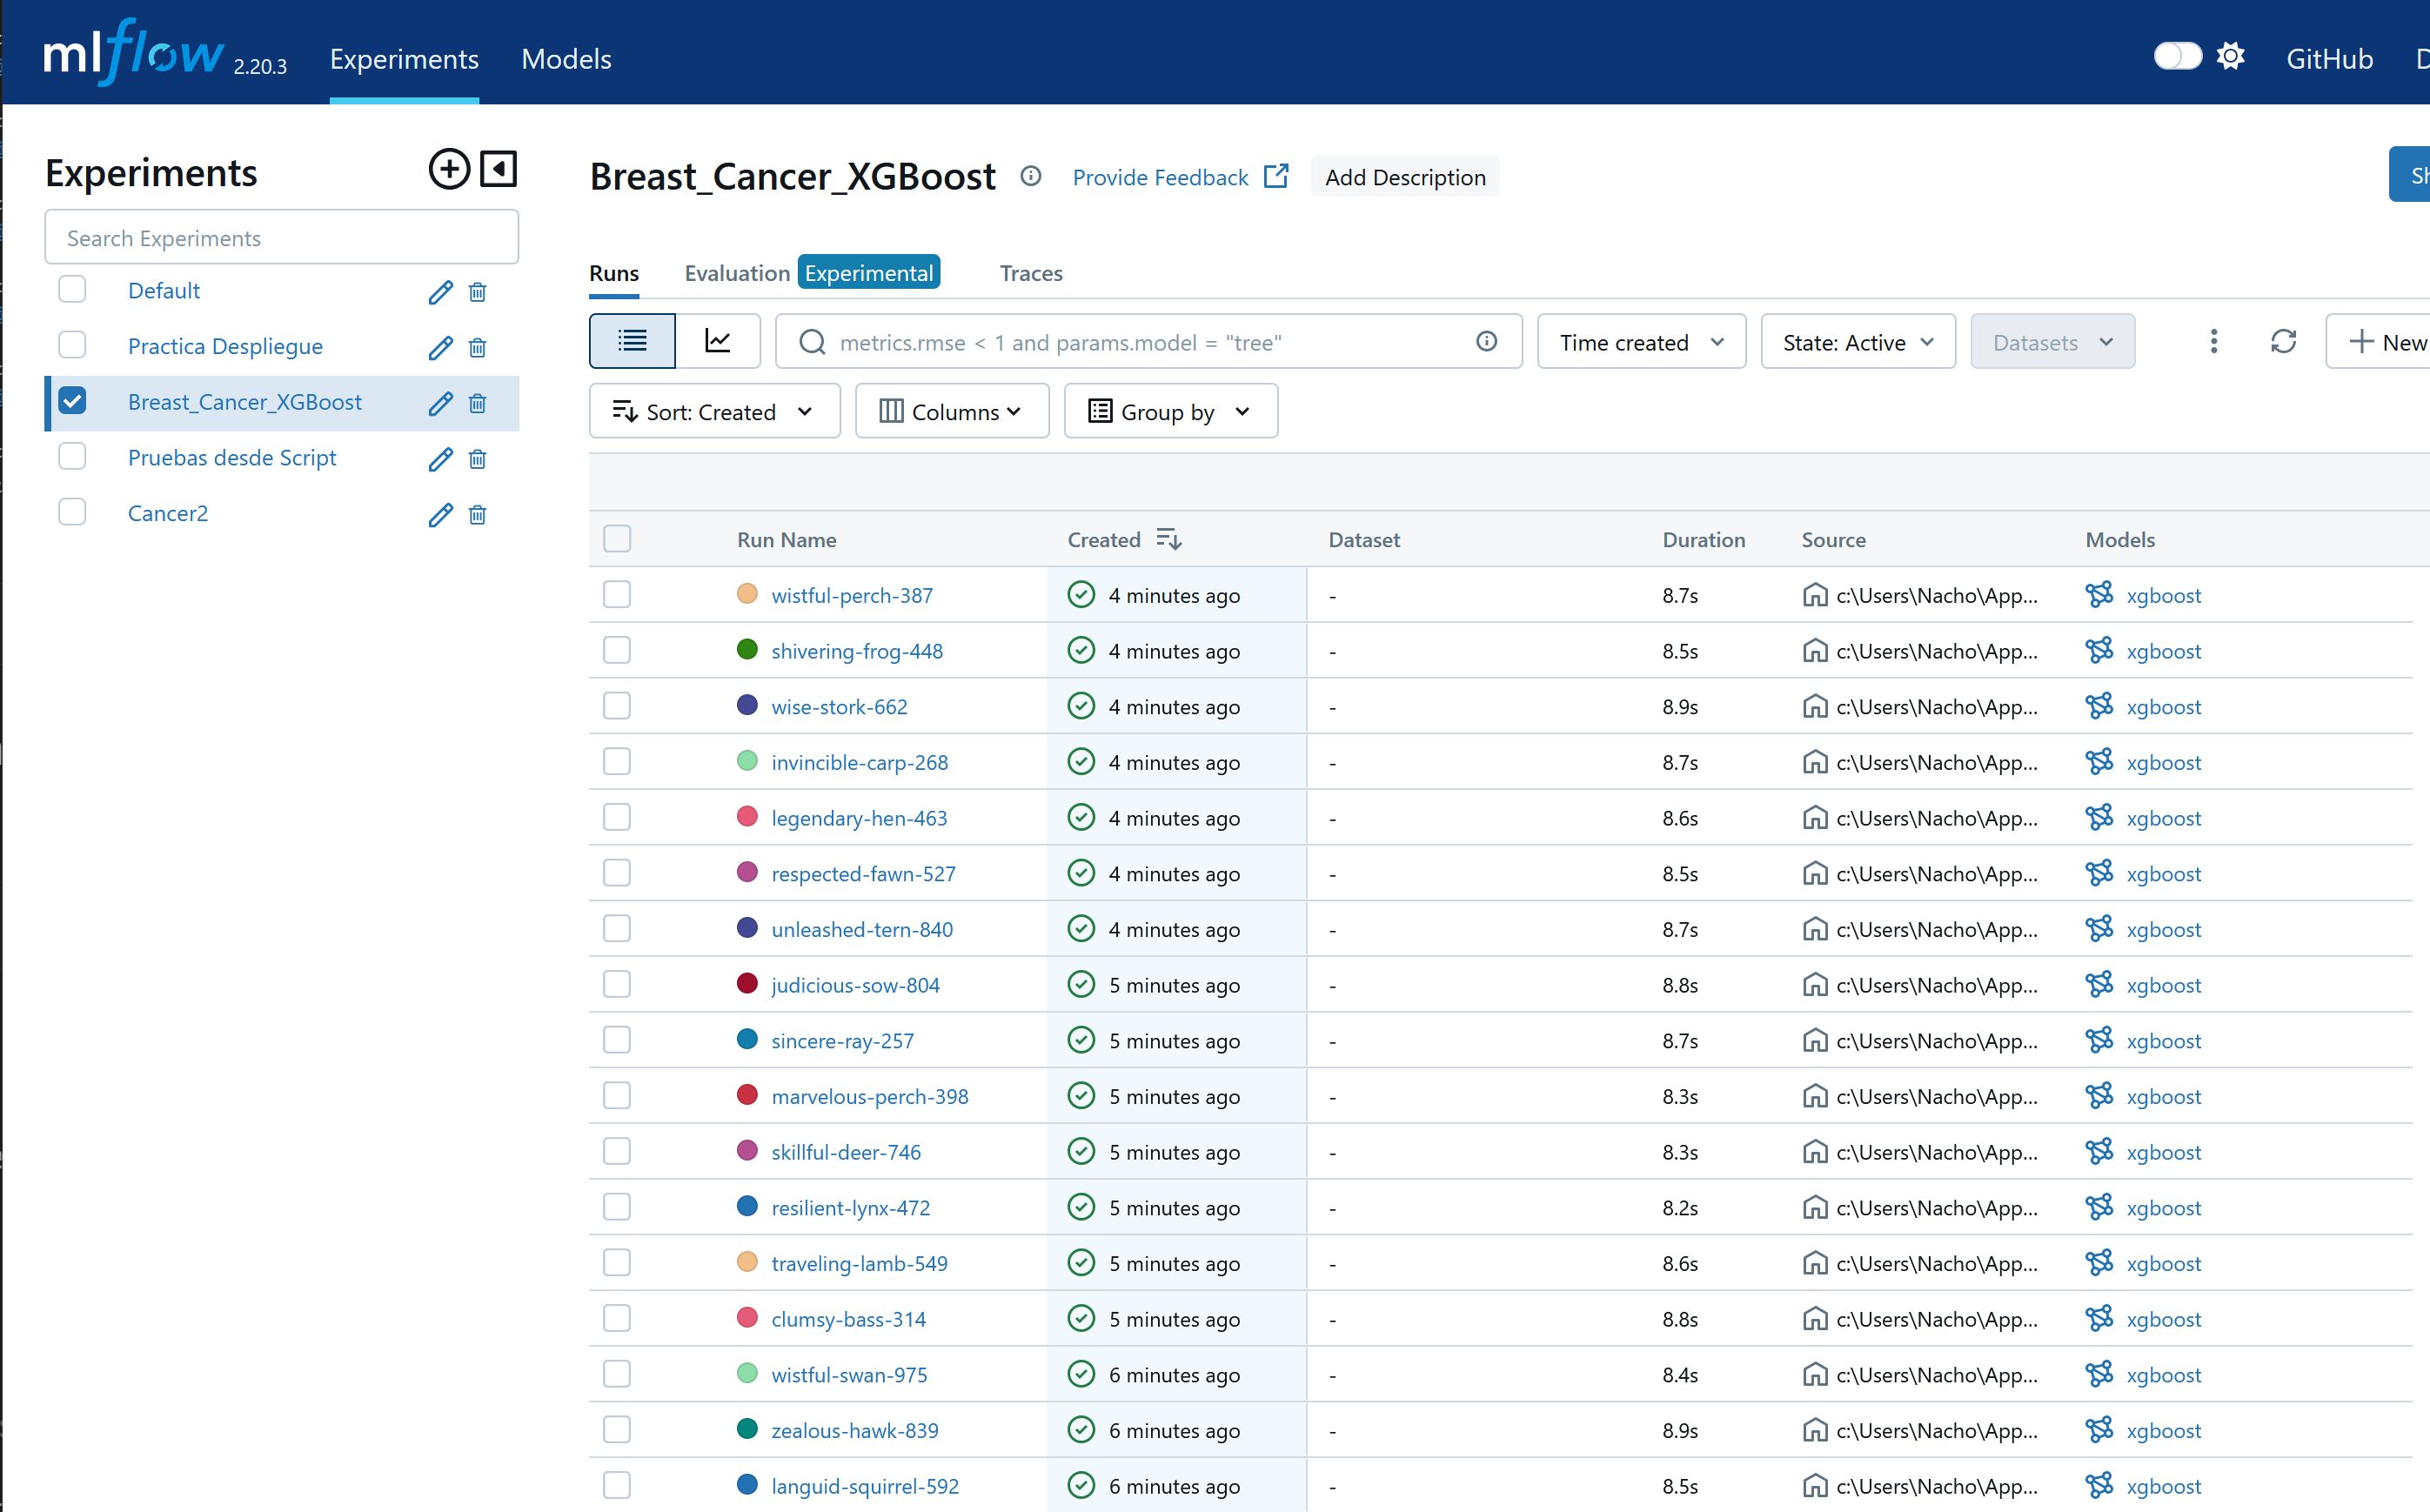

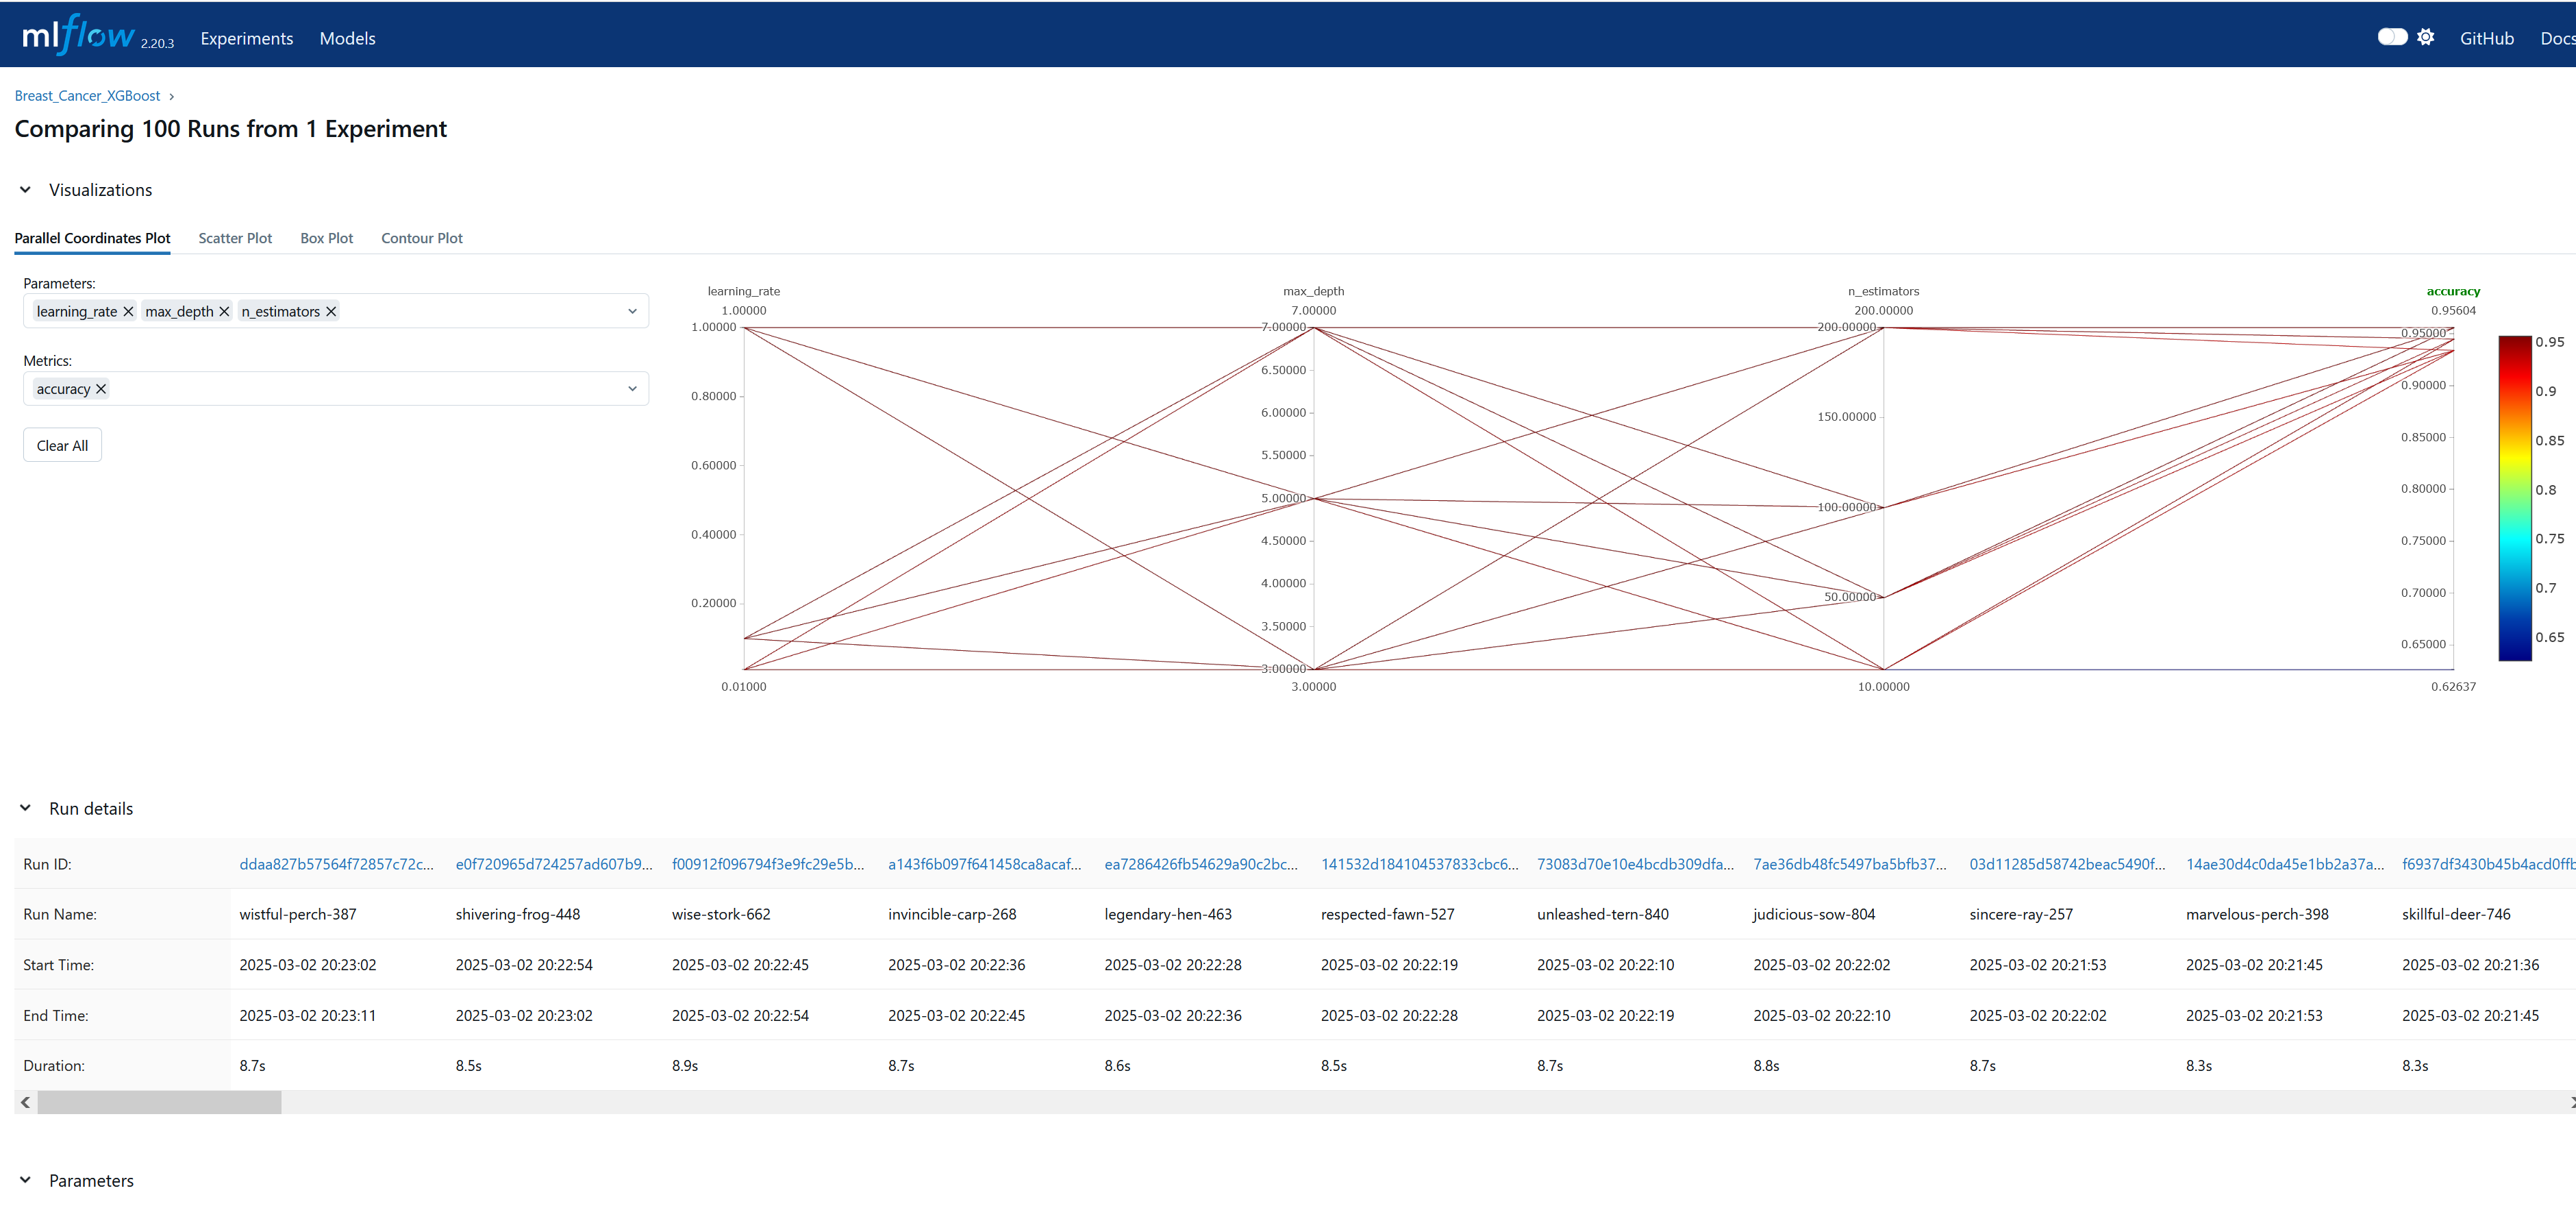

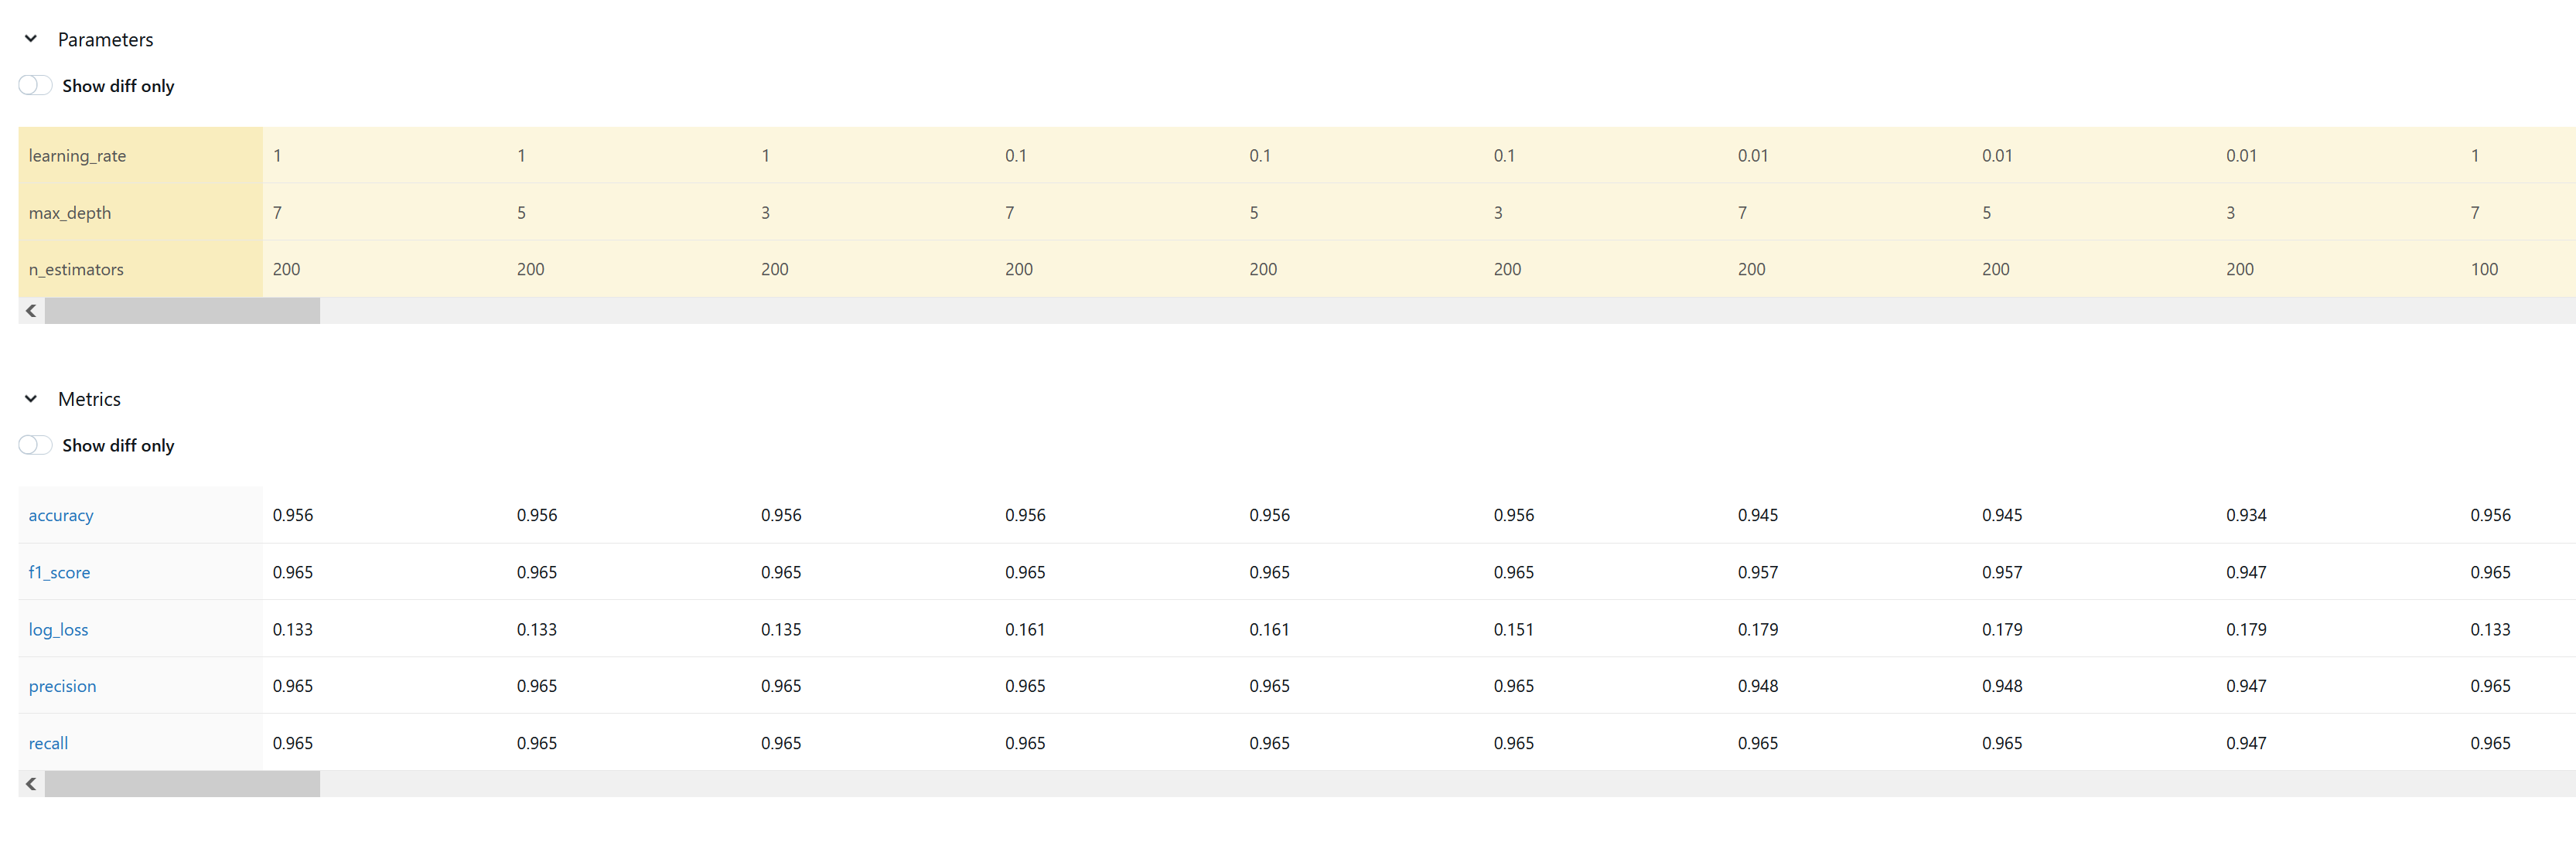

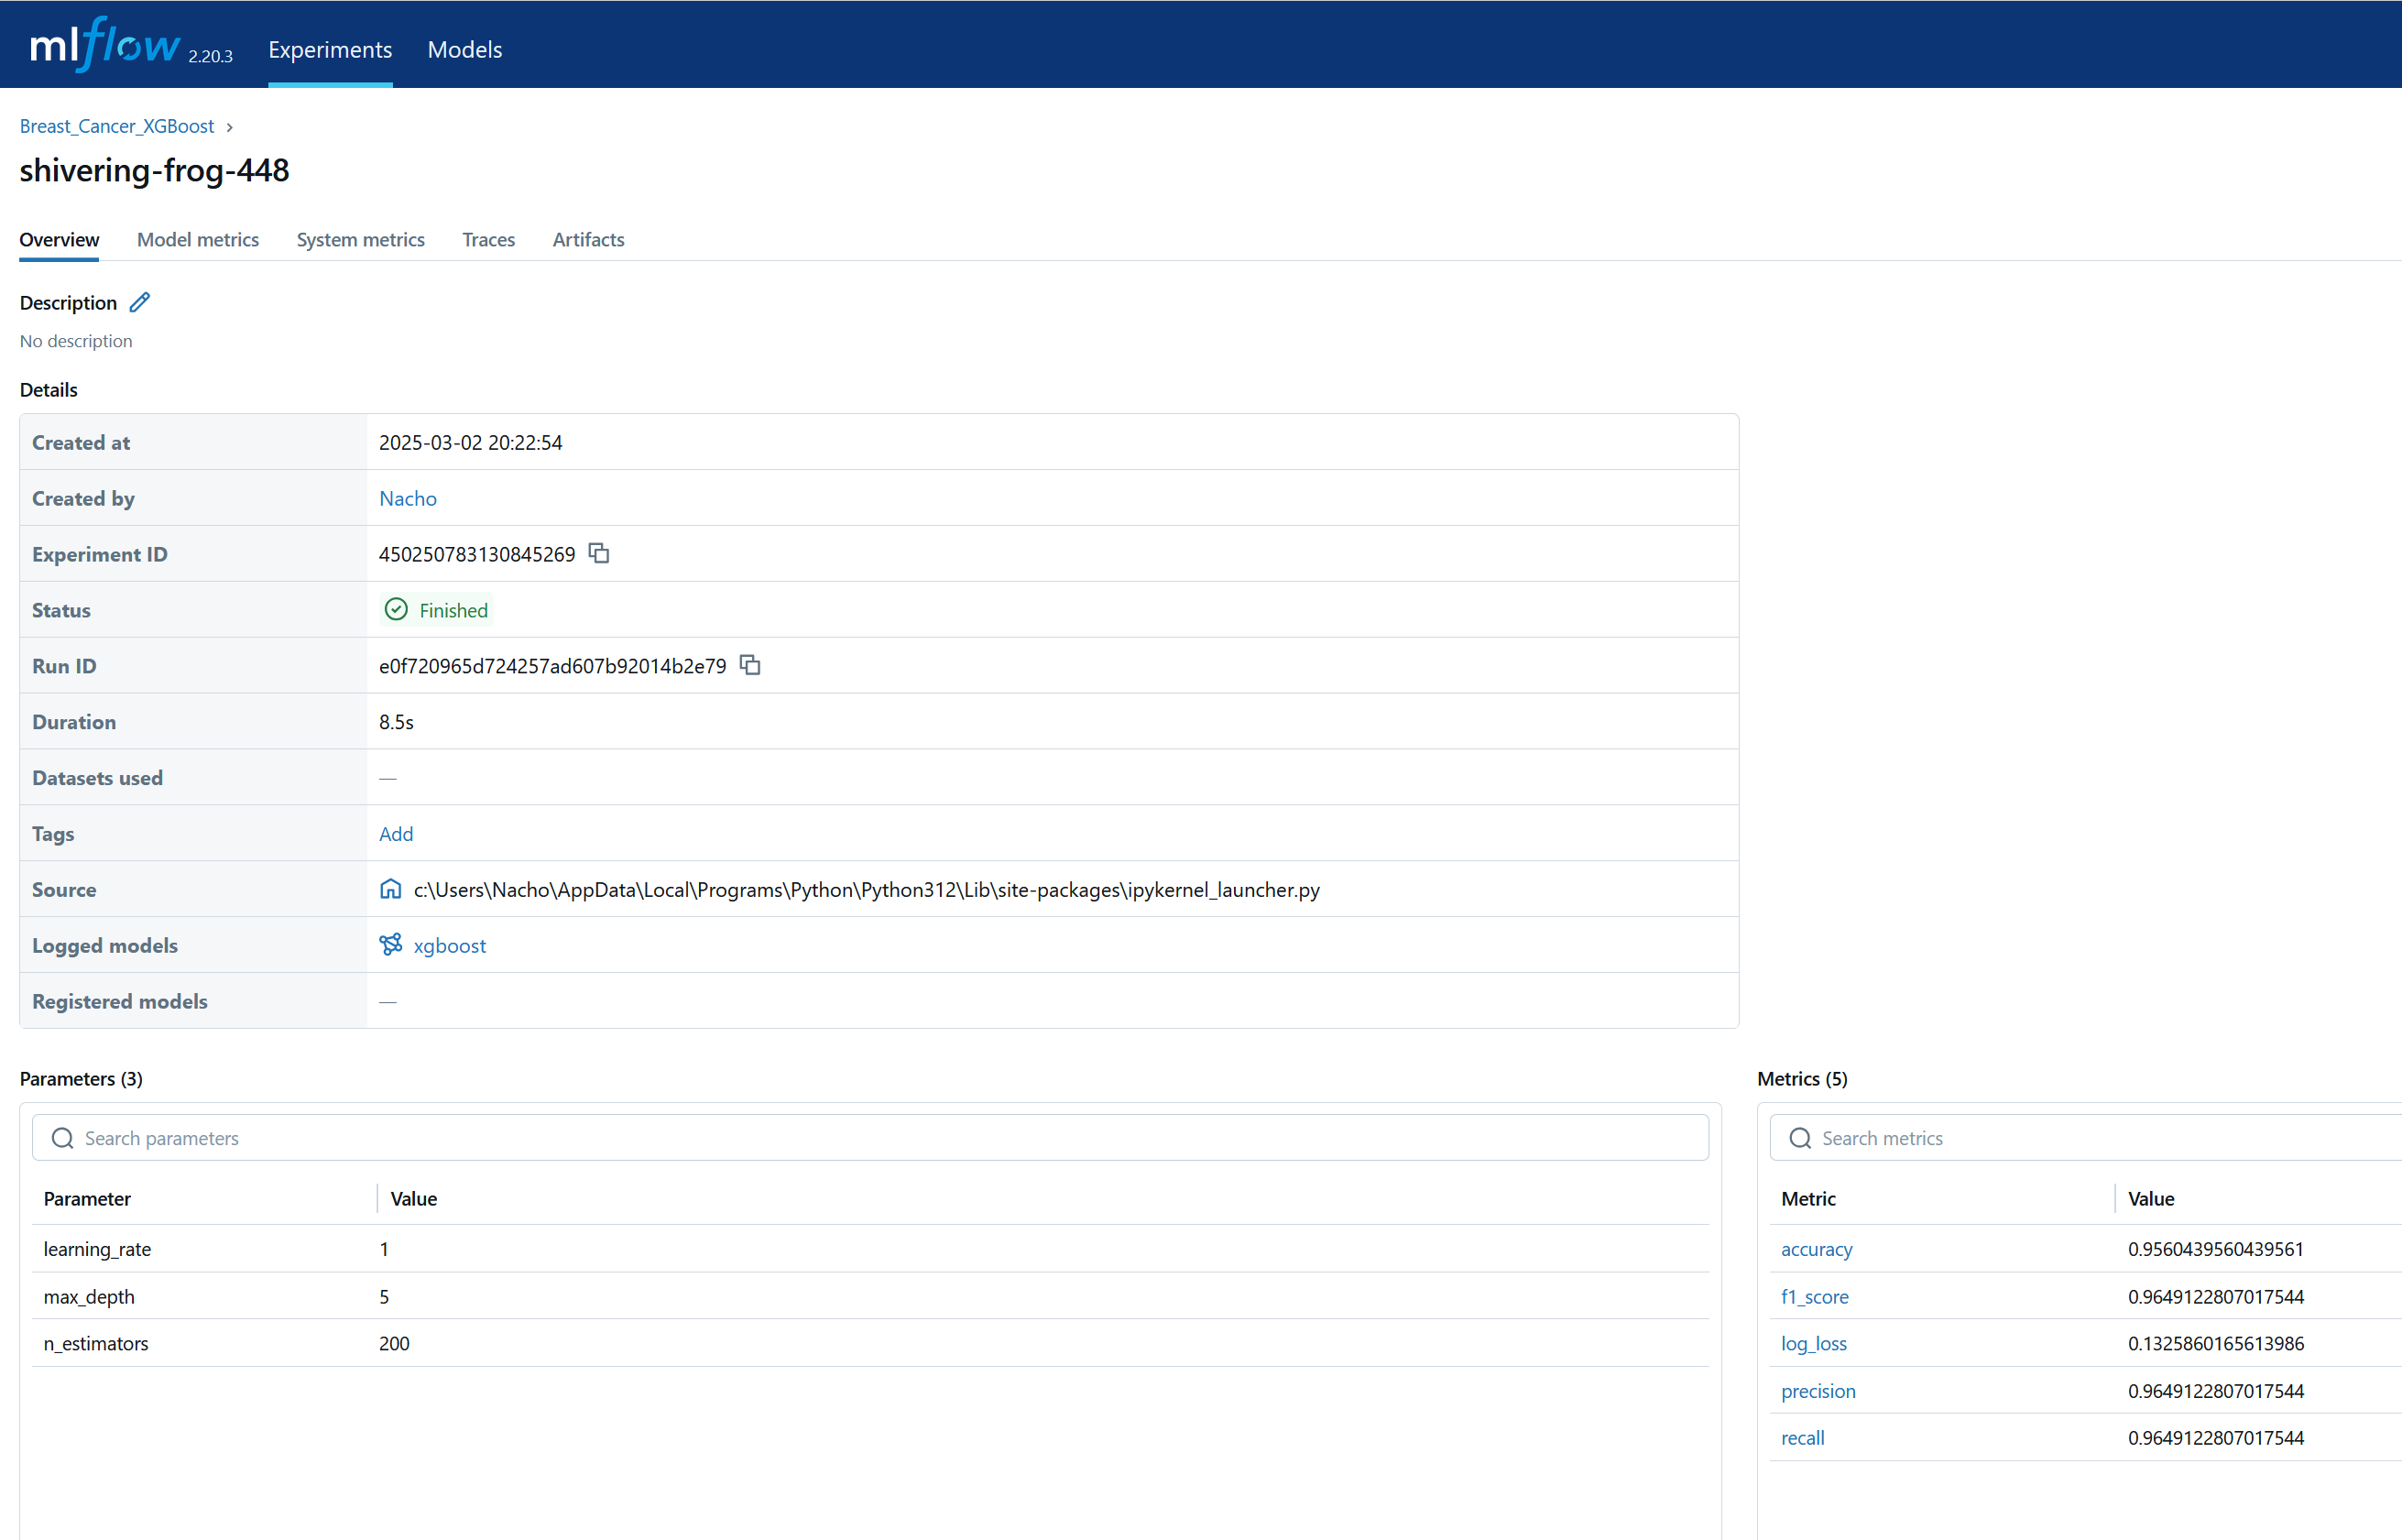

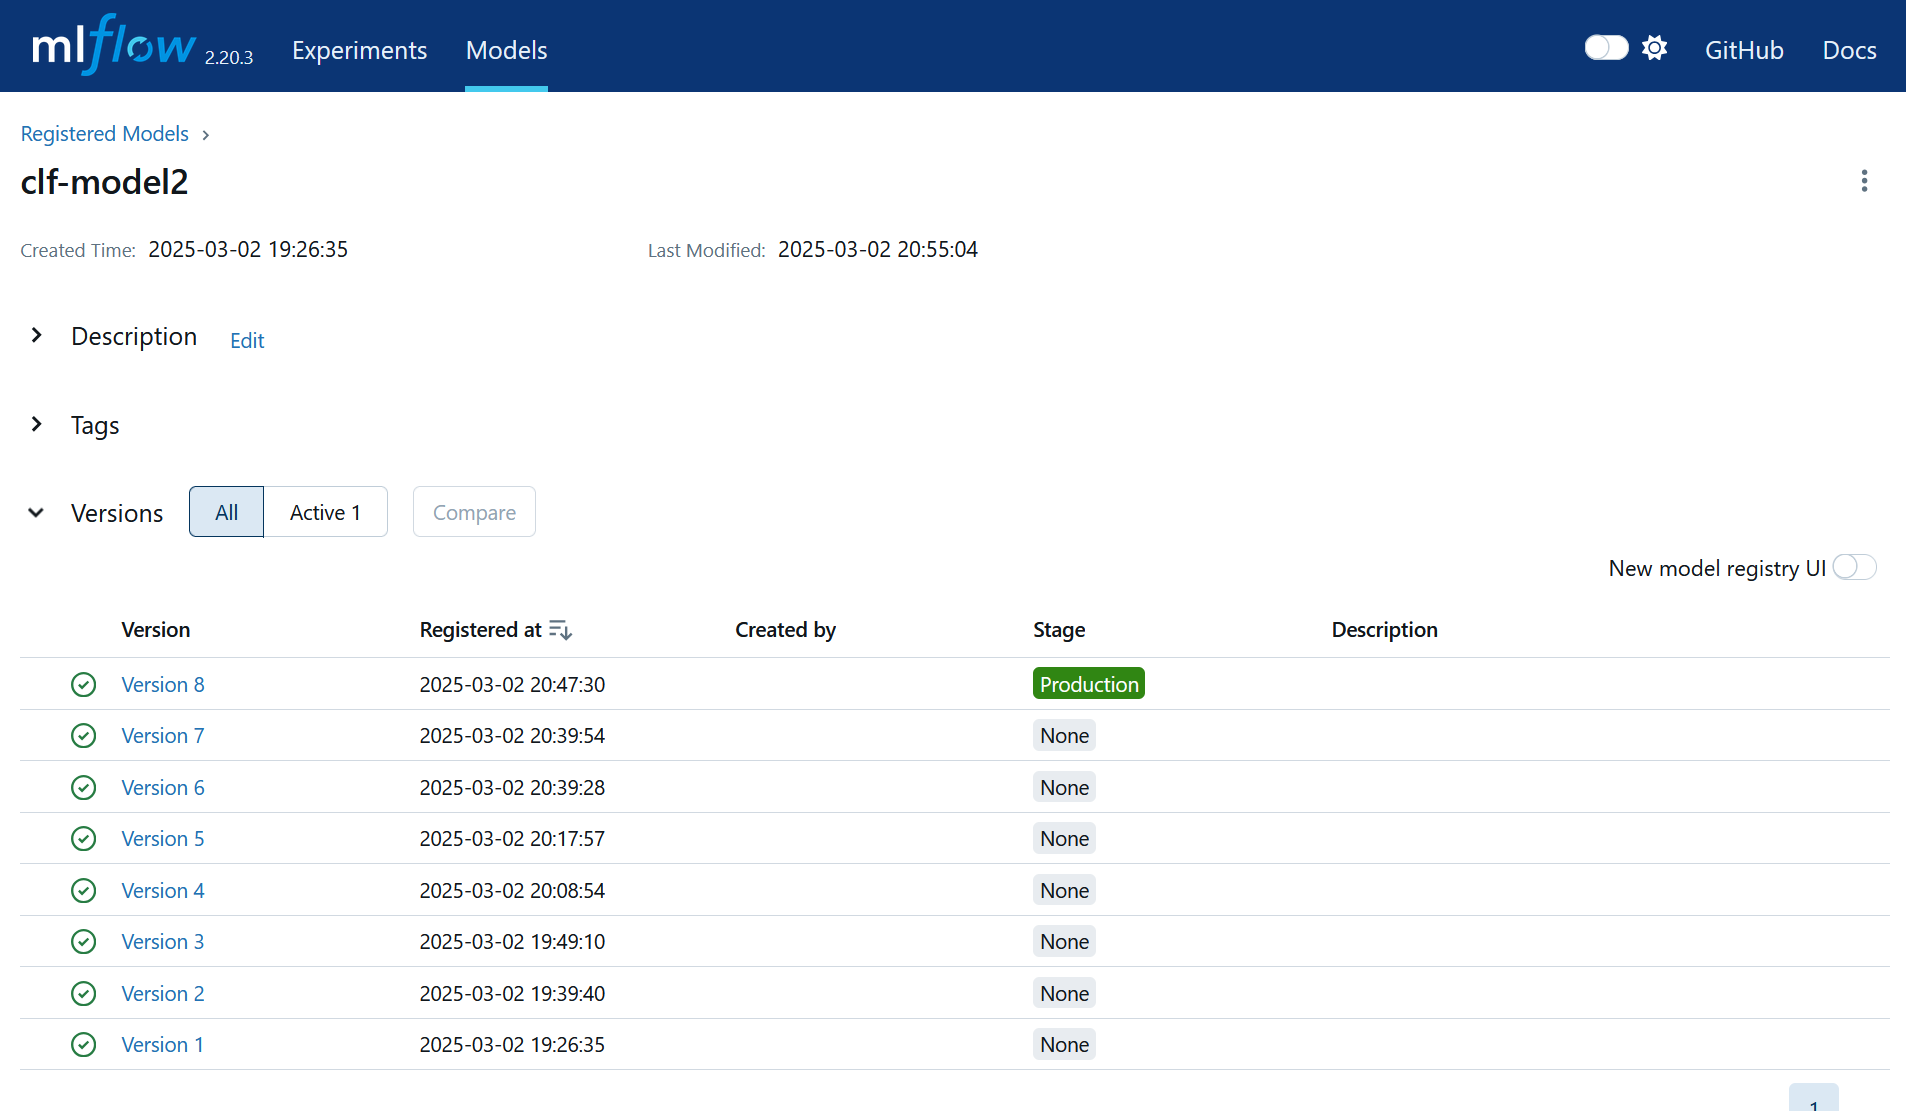

## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [32]:
%%writefile funciones_practica_cancer.py
import argparse
import time
import pandas as pd
import numpy as np
import mlflow
import mlflow.xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score
from sklearn.datasets import load_breast_cancer

def argumentos():
    parser = argparse.ArgumentParser(description='Ejecutar modelo XGBoost con MLflow tracking.')
    parser.add_argument('--nombre_job', type=str, help='Nombre del experimento en MLflow.', required=False, default="cancer-xgboost-experiment")
    parser.add_argument('--n_estimators_list', nargs='+', type=int, help='Lista de valores para n_estimators.', required=False, default=[10, 50, 100, 200])
    return parser.parse_args()

def load_dataset():
    cancer = load_breast_cancer()
    df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target
    return df

def data_treatment(df):
    train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])

    test_target = test['target']
    test[['target']].to_csv('test-target.csv', index=False)
    test.drop(columns=['target']).to_csv('test.csv', index=False)

    features = [x for x in df.columns if x != 'target']
    x_train, x_test, y_train, y_test = train_test_split(train[features], train['target'],
                                                        test_size=0.2, random_state=42, stratify=train['target'])
    return x_train, x_test, y_train, y_test

def mlflow_tracking(nombre_job, x_train, x_test, y_train, y_test, n_estimators_list):
    time.sleep(5)
    mlflow.set_experiment(nombre_job)

    for n in n_estimators_list:
        with mlflow.start_run():
            clf = XGBClassifier(n_estimators=n, max_depth=3, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')

            preprocessor = Pipeline(steps=[('scaler', StandardScaler())])
            model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
            model.fit(x_train, y_train)

            y_pred = model.predict(x_test)
            y_pred_proba = model.predict_proba(x_test)

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            logloss = log_loss(y_test, y_pred_proba)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')

            mlflow.log_param('n_estimators', n)
            mlflow.log_metric('accuracy', accuracy)
            mlflow.log_metric('f1_score', f1)
            mlflow.log_metric('log_loss', logloss)
            mlflow.log_metric('precision', precision)
            mlflow.log_metric('recall', recall)
            mlflow.xgboost.log_model(clf, 'cancer_xgboost_model')

    print("Entrenamiento y logging en MLflow finalizado correctamente.")

if __name__ == '__main__':
    args = argumentos()
    df = load_dataset()
    x_train, x_test, y_train, y_test = data_treatment(df)
    mlflow_tracking(args.nombre_job, x_train, x_test, y_train, y_test, args.n_estimators_list)


Writing funciones_practica_cancer.py


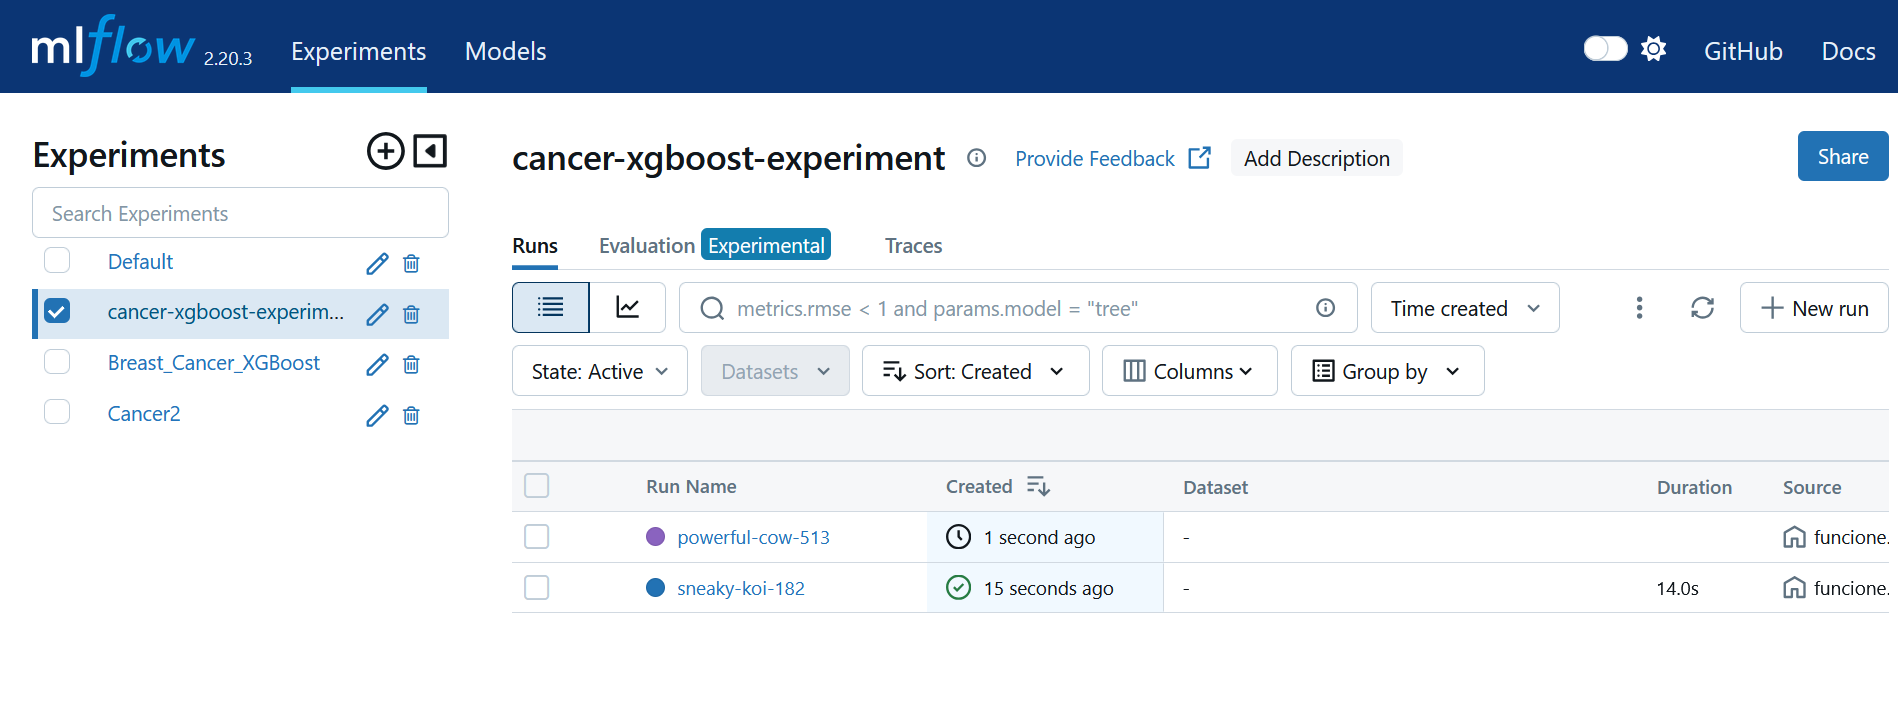

## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 



In [40]:

%%writefile main_practica.py
from fastapi import FastAPI, HTTPException
import os
import google.generativeai as genai
from dotenv import load_dotenv
from transformers import pipeline
import math

app = FastAPI()

# 1.Saludo
@app.get('/saluda')
def saluda(nombre: str, apellido: str,):
    return {'Message': f'Hola {nombre} {apellido}.'}


# 2.Calculo volumen cilindro
@app.get('/volumen_cilindro')
def volumen_cilindro(radio: float, altura: float):
    if radio <= 0 or altura <= 0:
        raise HTTPException(
            status_code=400,
            detail="El radio y la altura deben ser mayores que 0."
        )
    volumen = math.pi * (radio ** 2) * altura
    return {"Volumen": volumen}


# 3️.Análisis de sentimiento (HF)
@app.get('/sentiment')
def sentiment_classification(prompt):
  sentiment_pipeline = pipeline('sentiment-analysis')
  return {'Sentiment': sentiment_pipeline(prompt)[0]['label']}

# 4.Resumen de texto (HF)
@app.get('/resumen')
def resumen_texto(text: str, max_length: int = 50, modelo: str = "facebook/bart-large-cnn"):
    # Cargar el pipeline de resumen con el modelo especificado
    summarizer = pipeline("summarization", model=modelo)
    
    # Obtener el resumen del texto
    resultado = summarizer(text, max_length=max_length, min_length=10, do_sample=False)
    
    # Retornar el resumen
    return {'Resumen': resultado[0]['summary_text']}

# 5. Traducción español-inglés (HF)
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

@app.get('/traducir')
def traducir(texto: str):
    try:
        resultado = translator(texto)[0]['translation_text']
        return {'Traducción': resultado}
    except Exception as e:
        return {'error': str(e)}



Overwriting main_practica.py


### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run

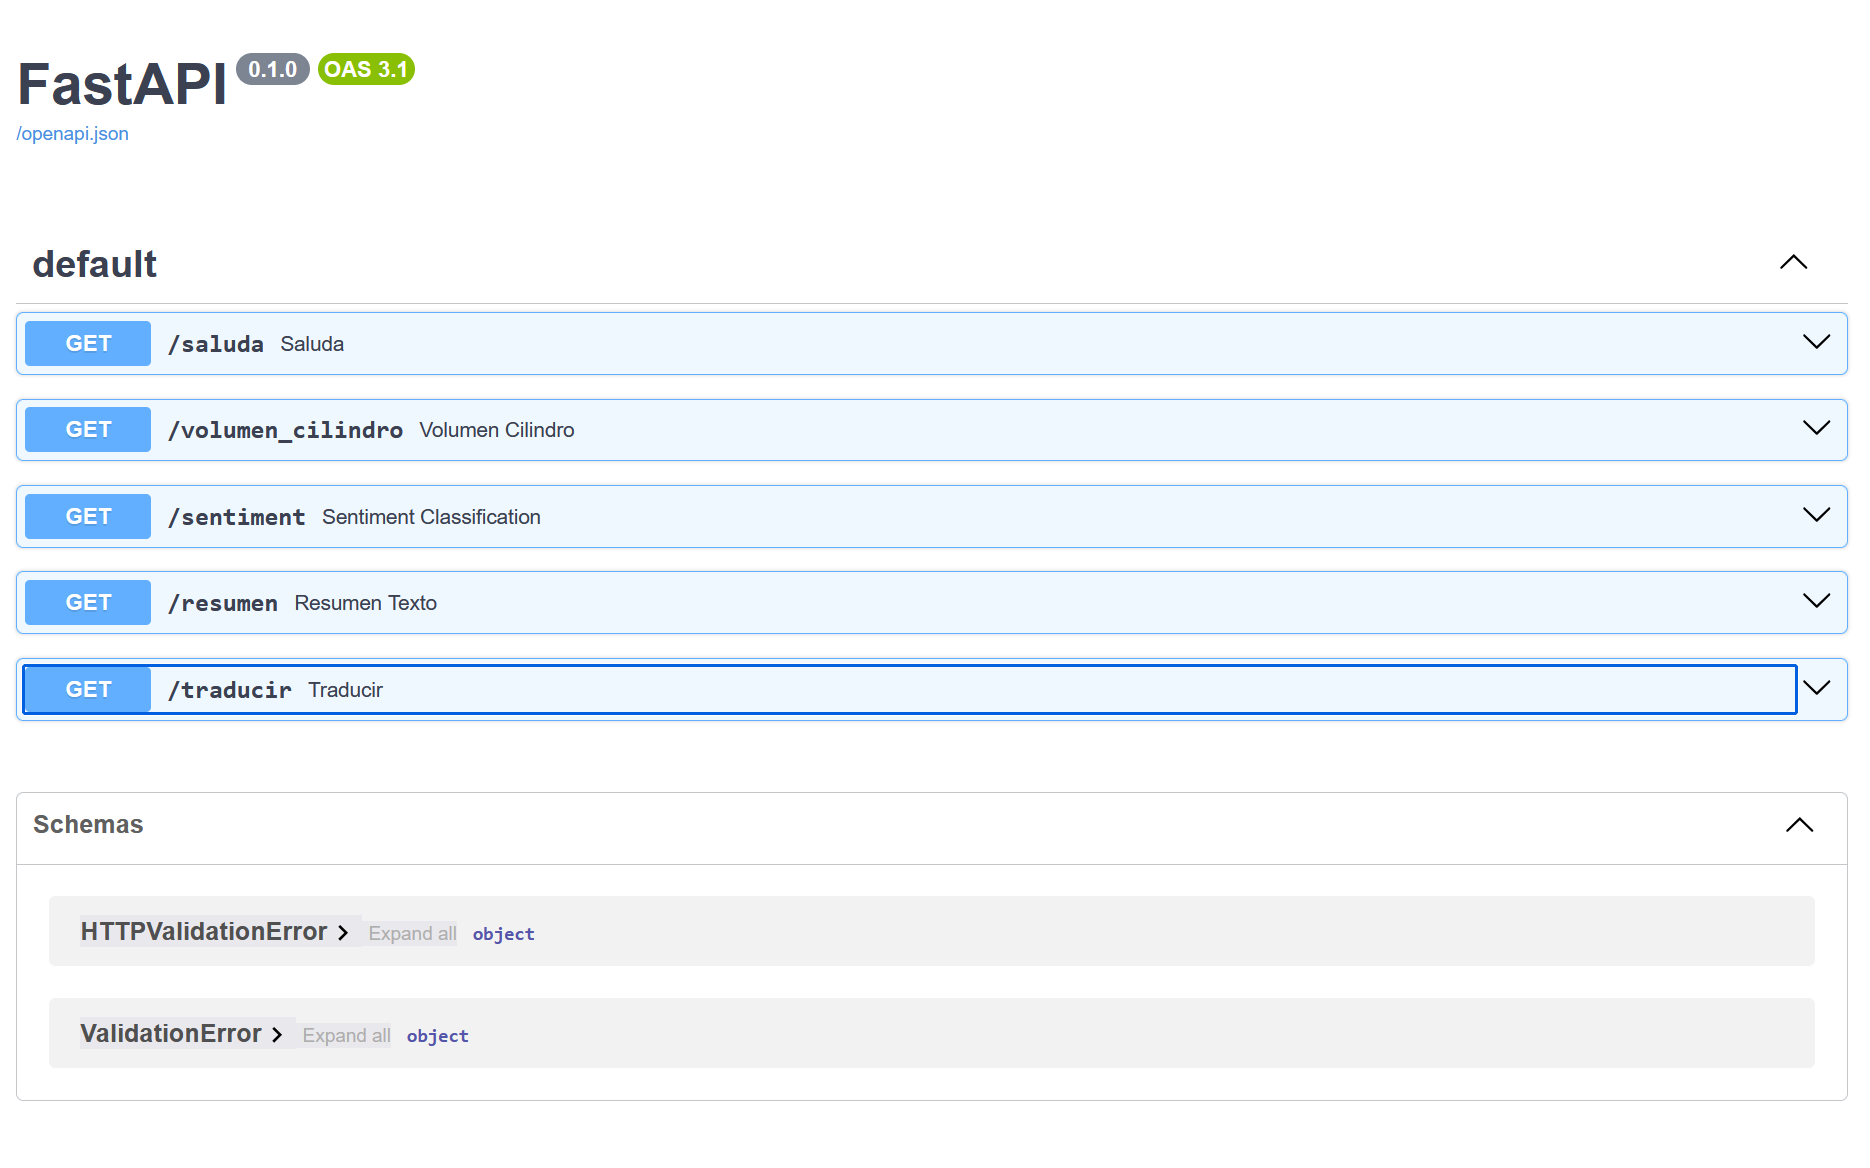

MODULO 1

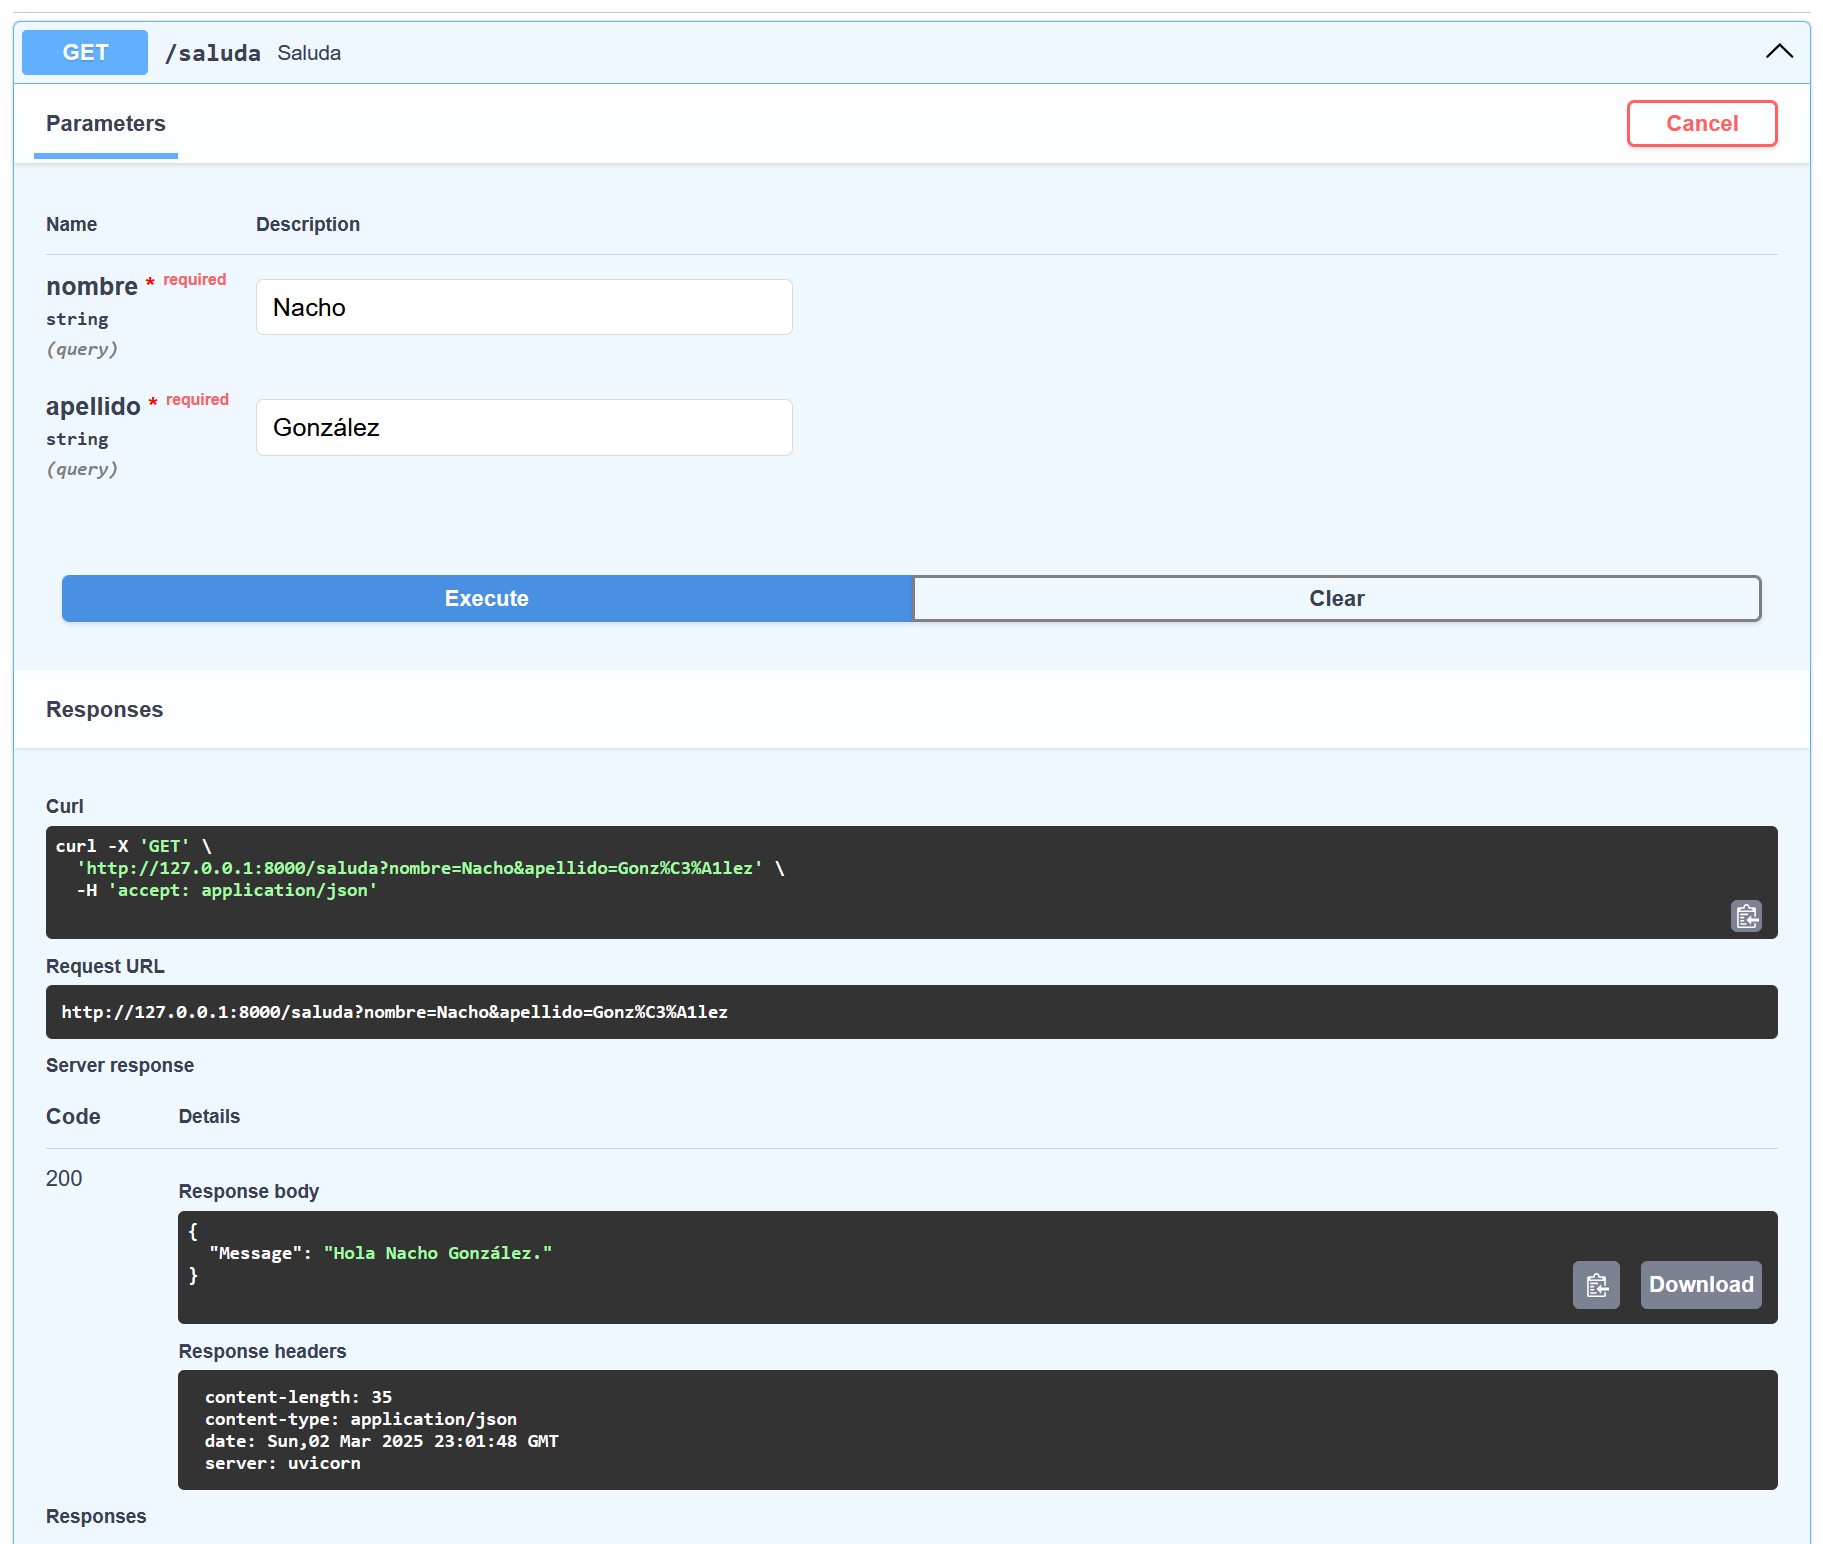

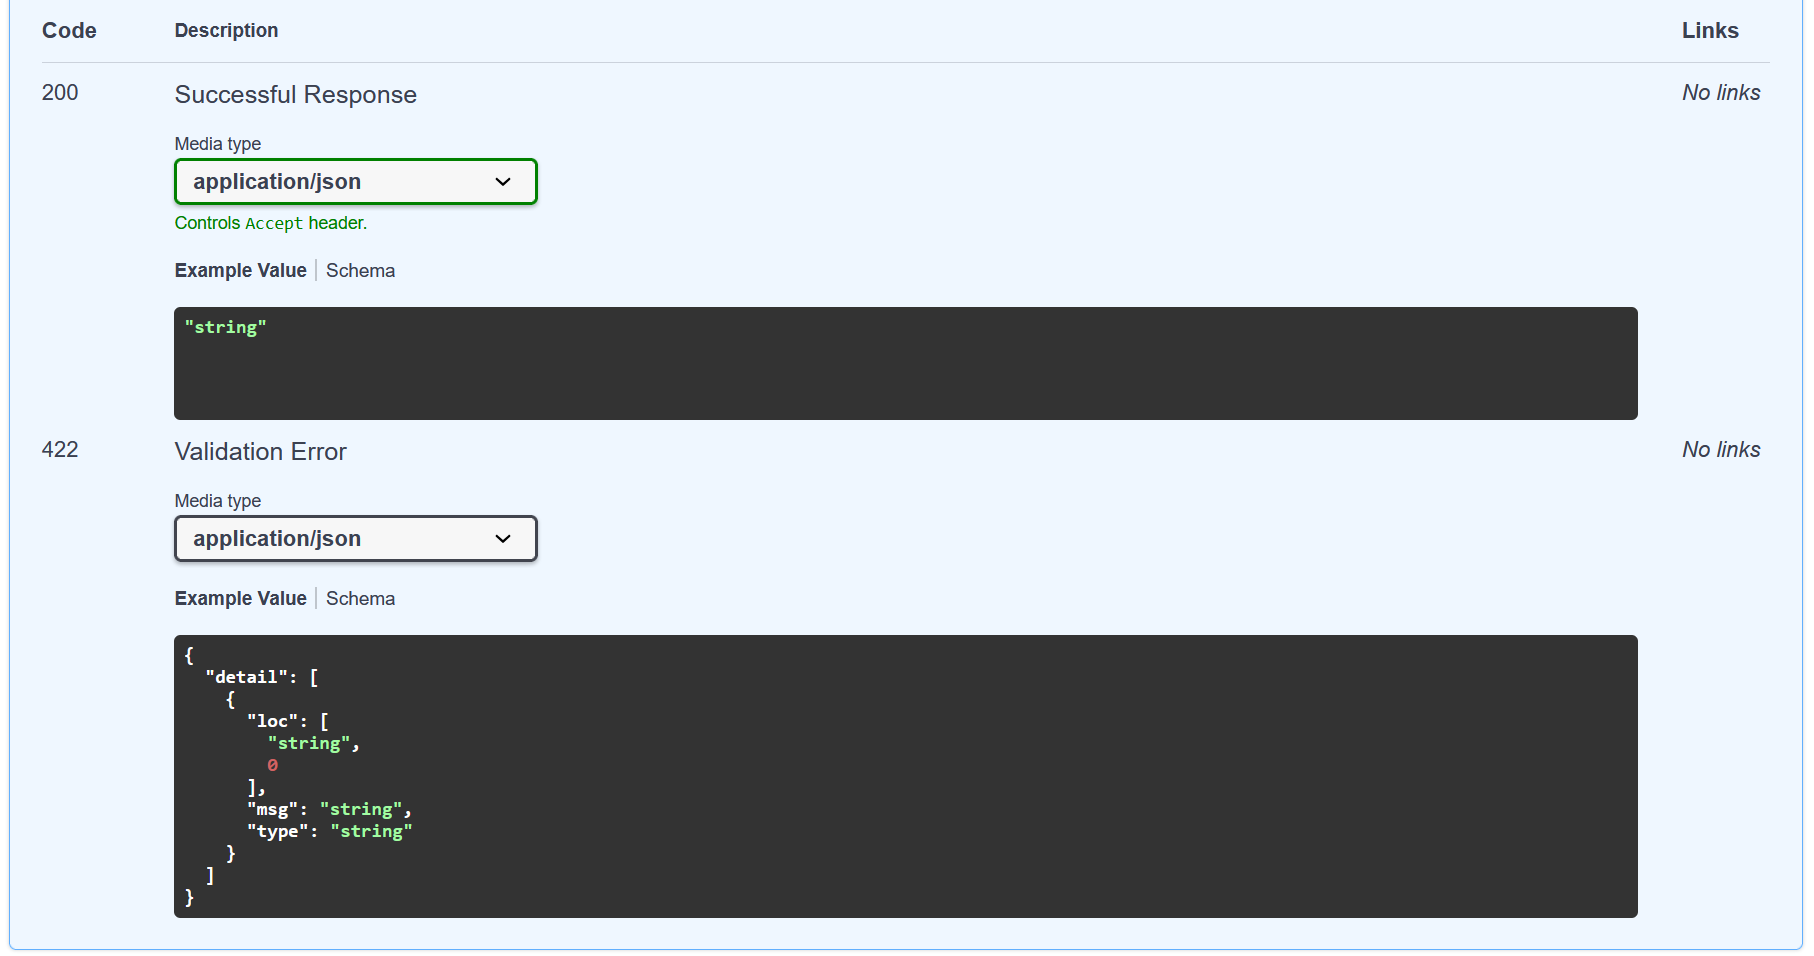

MODULO 2

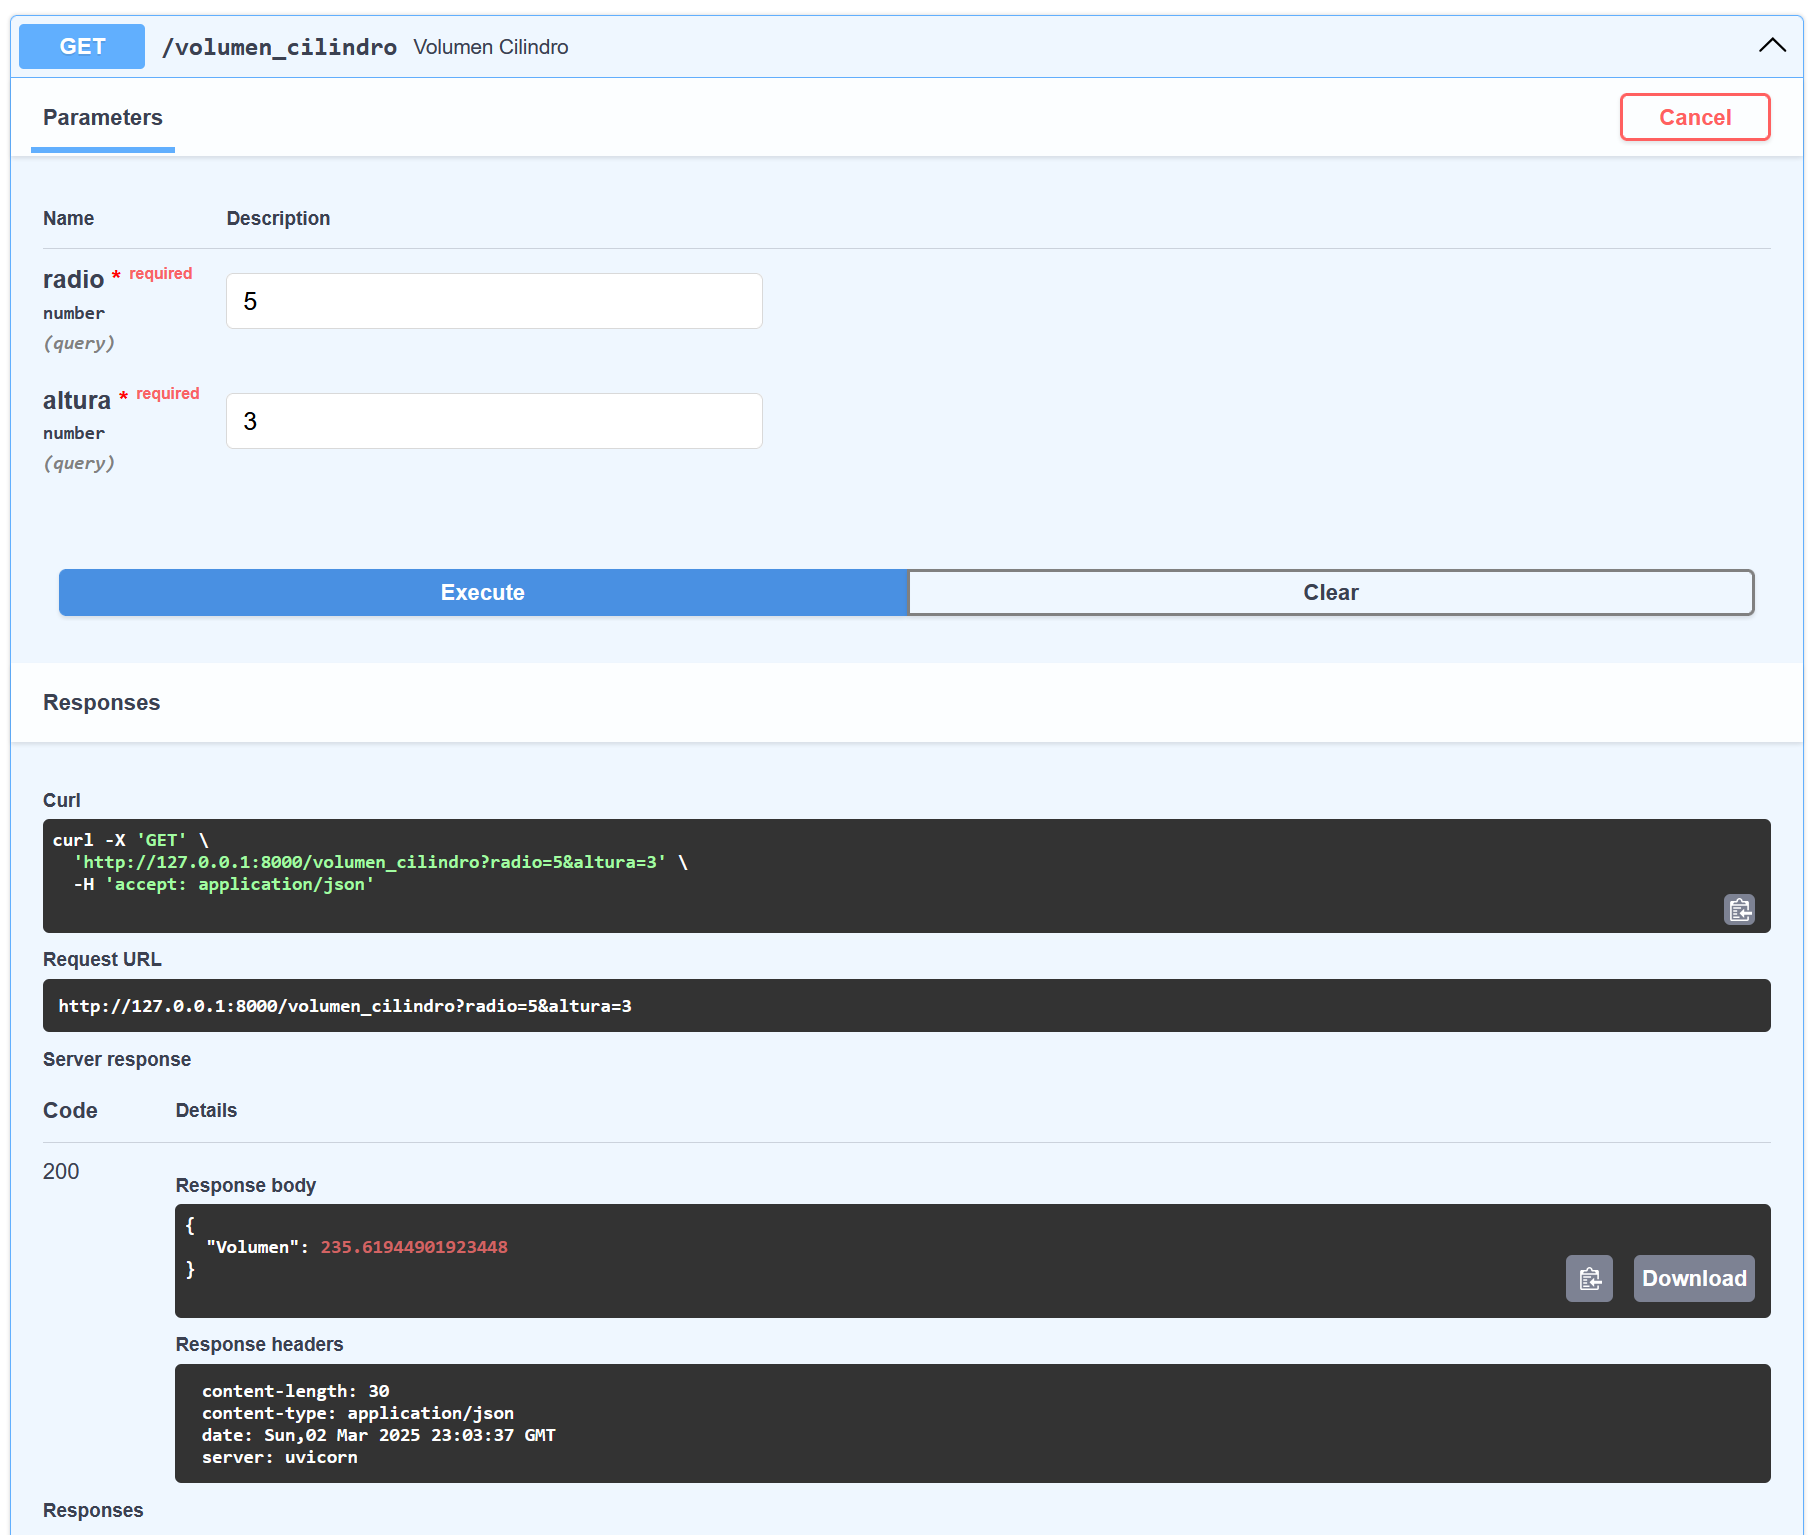

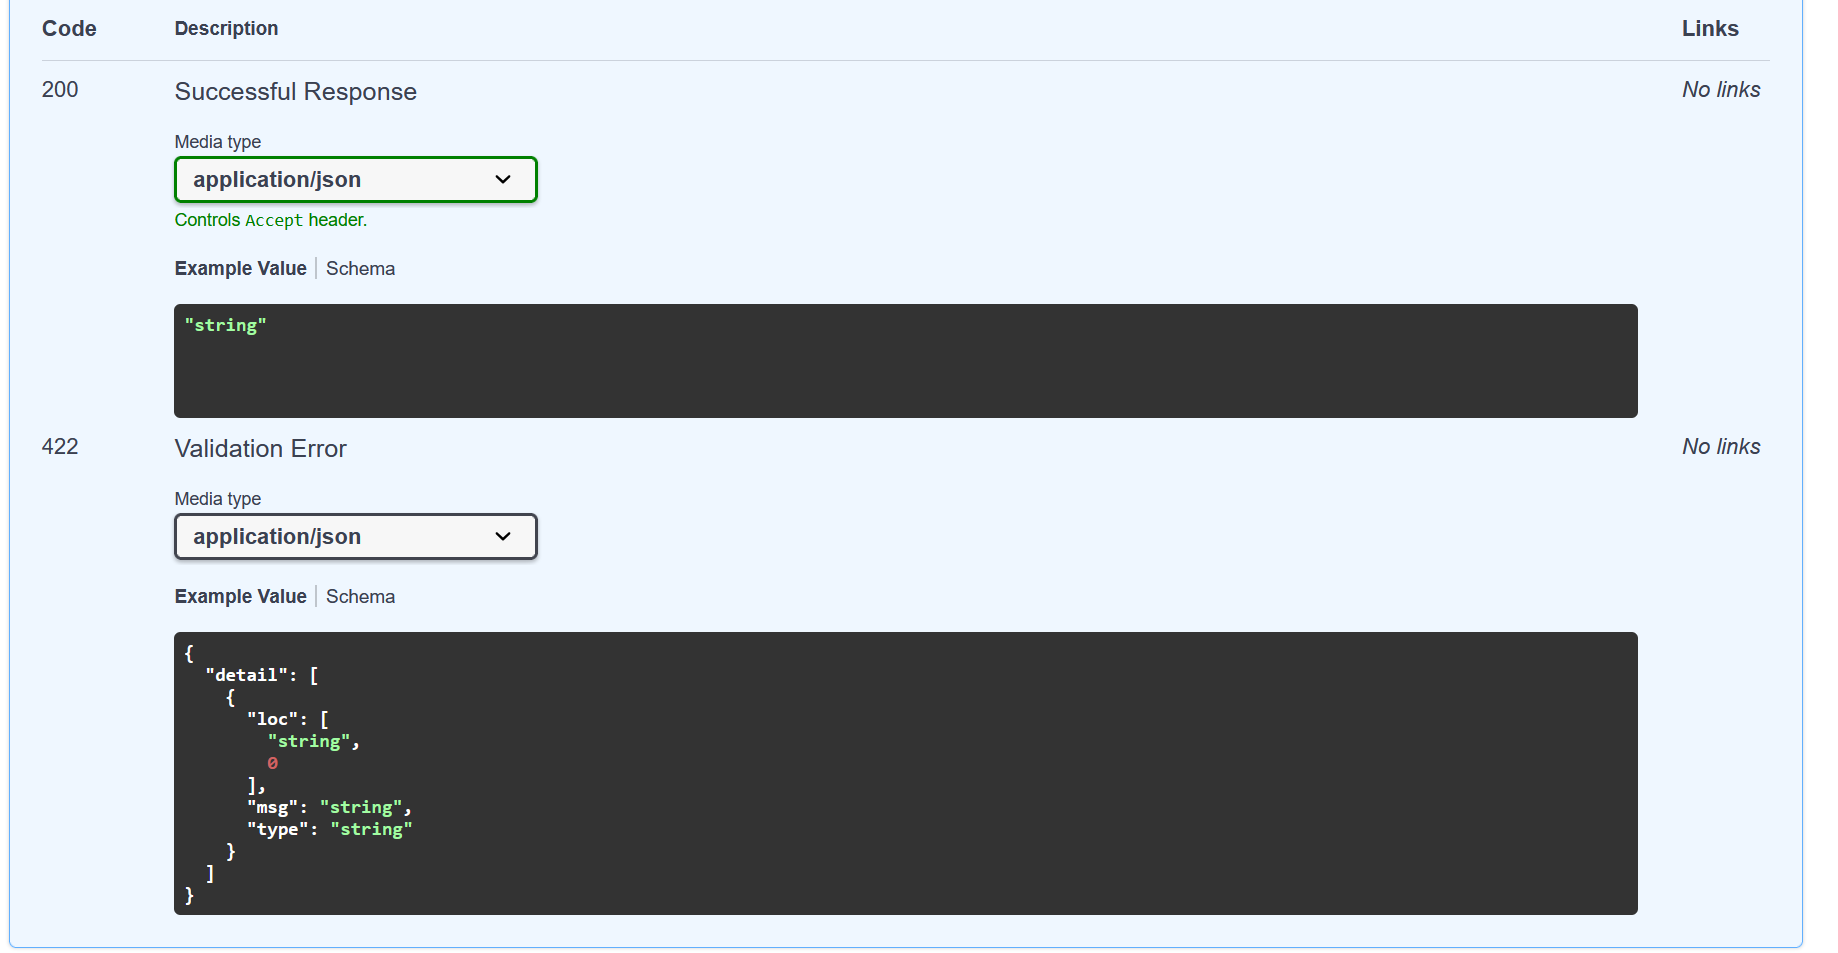

MODULO 3

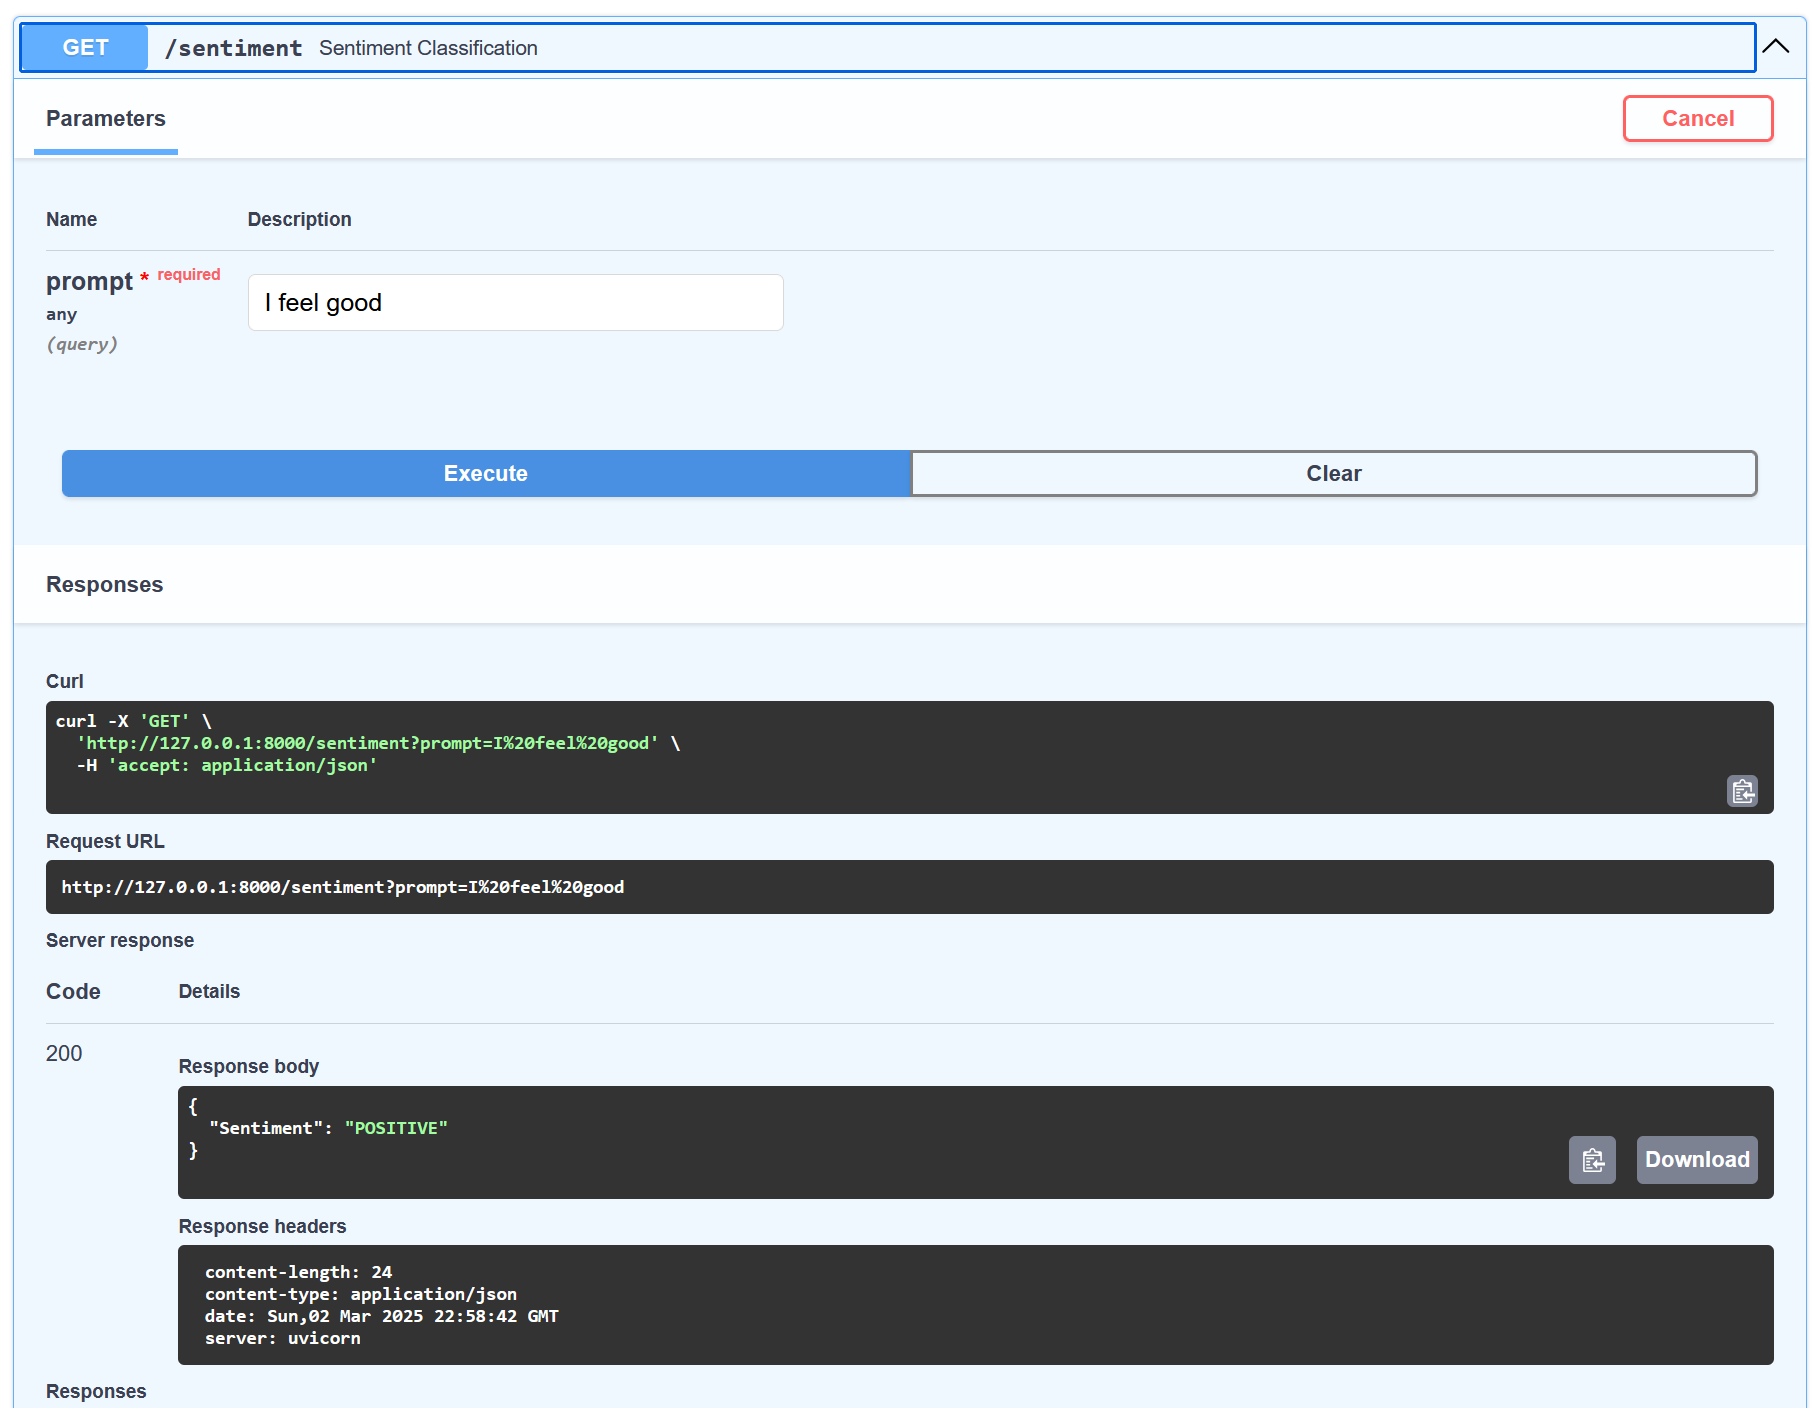

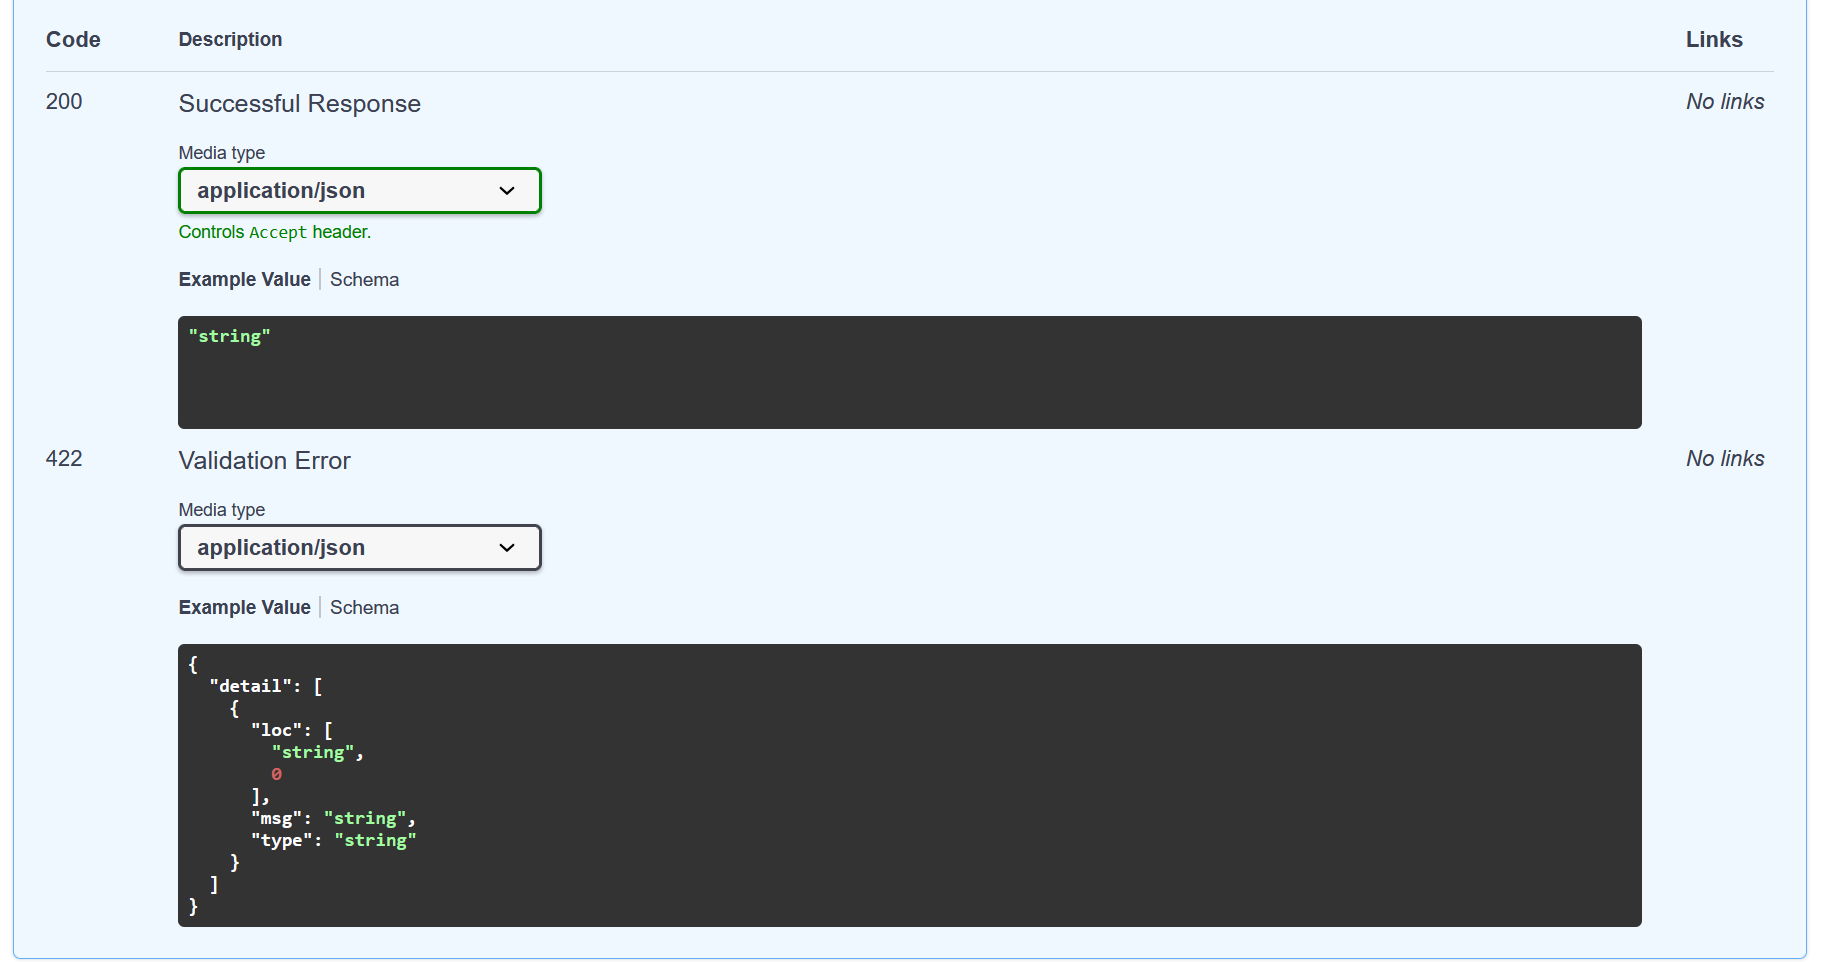

MODULO 4 

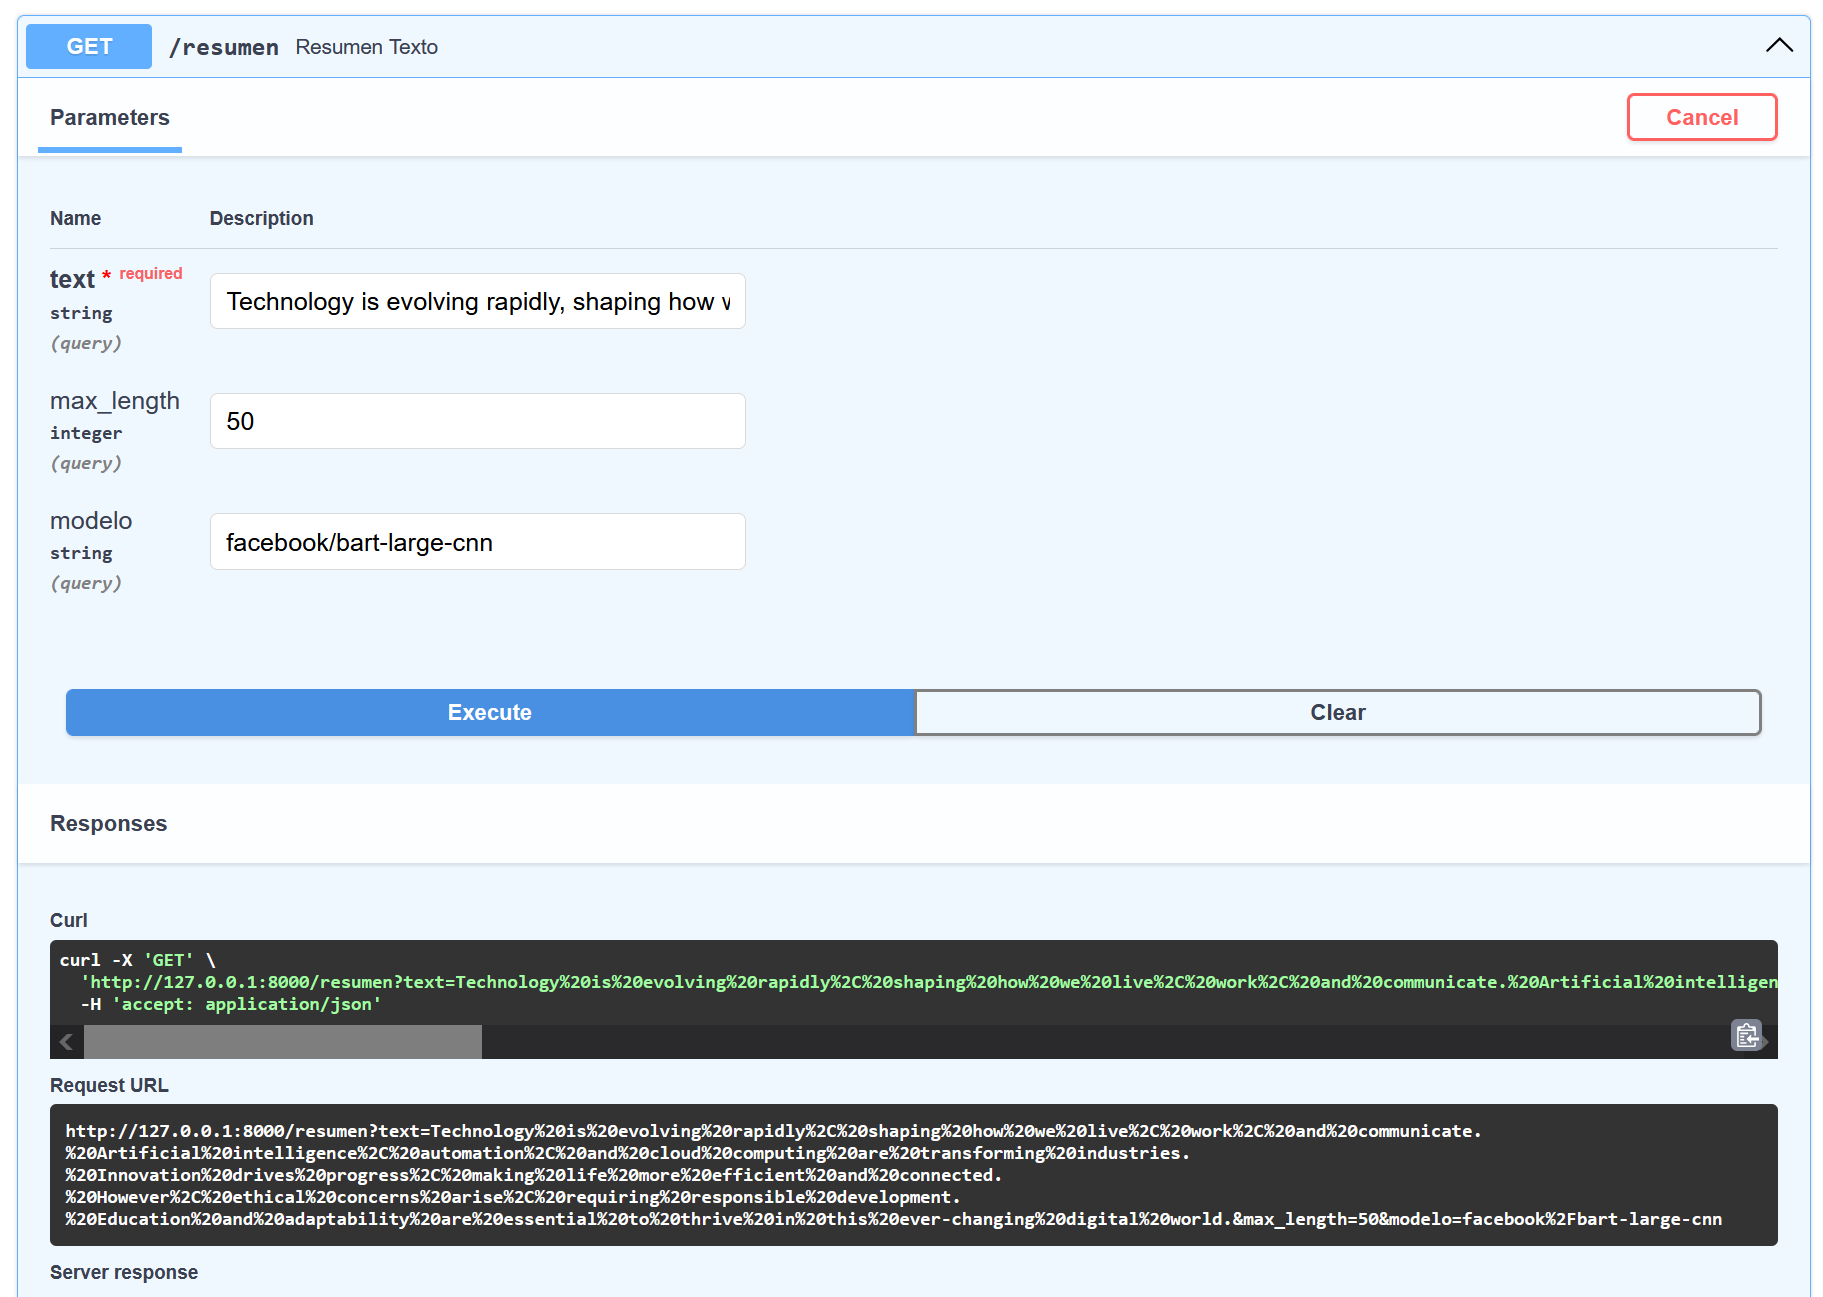

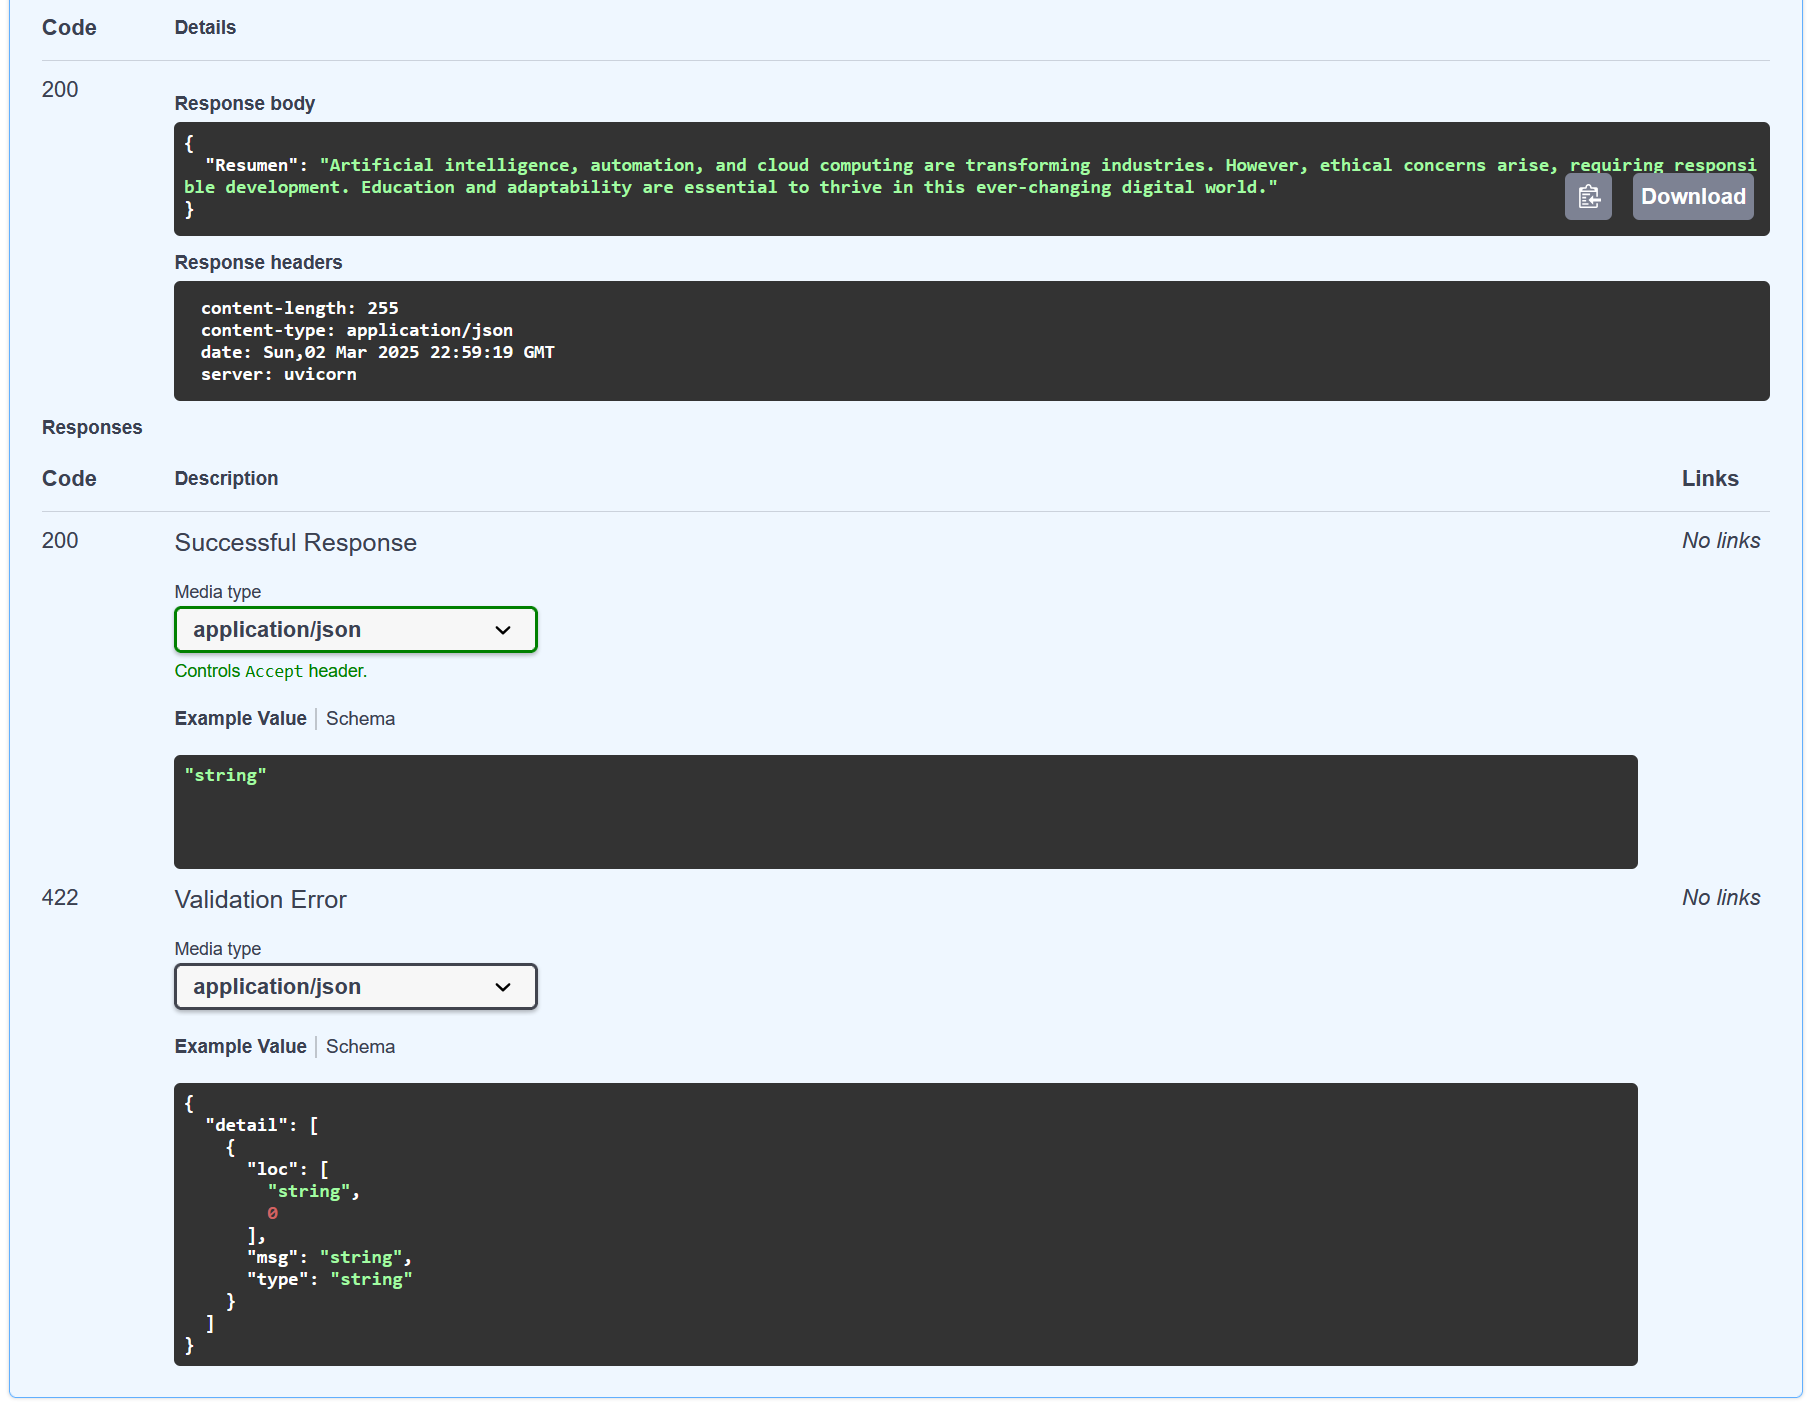

MODULO 5

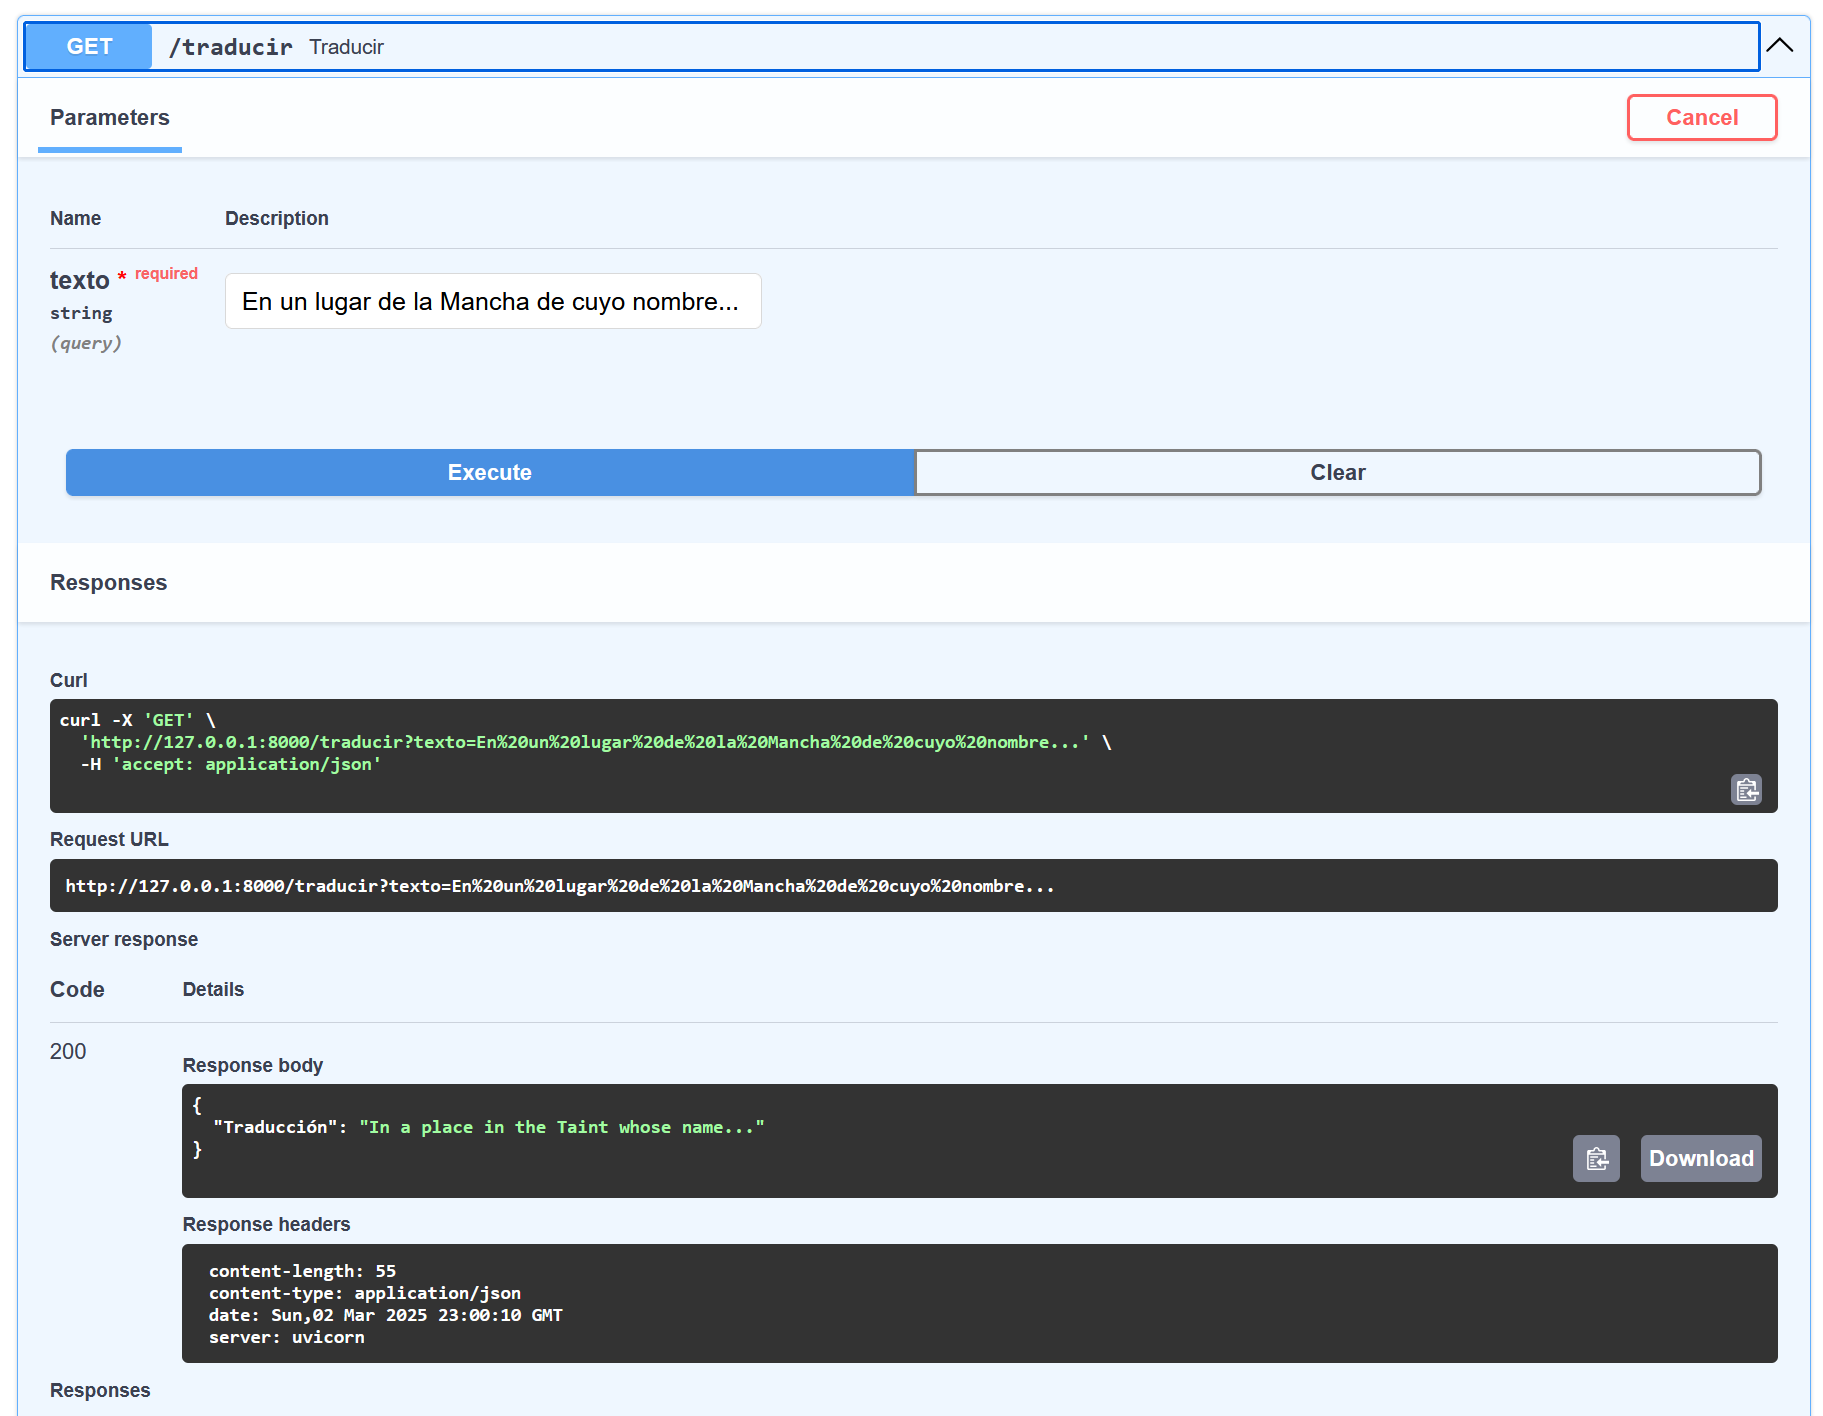

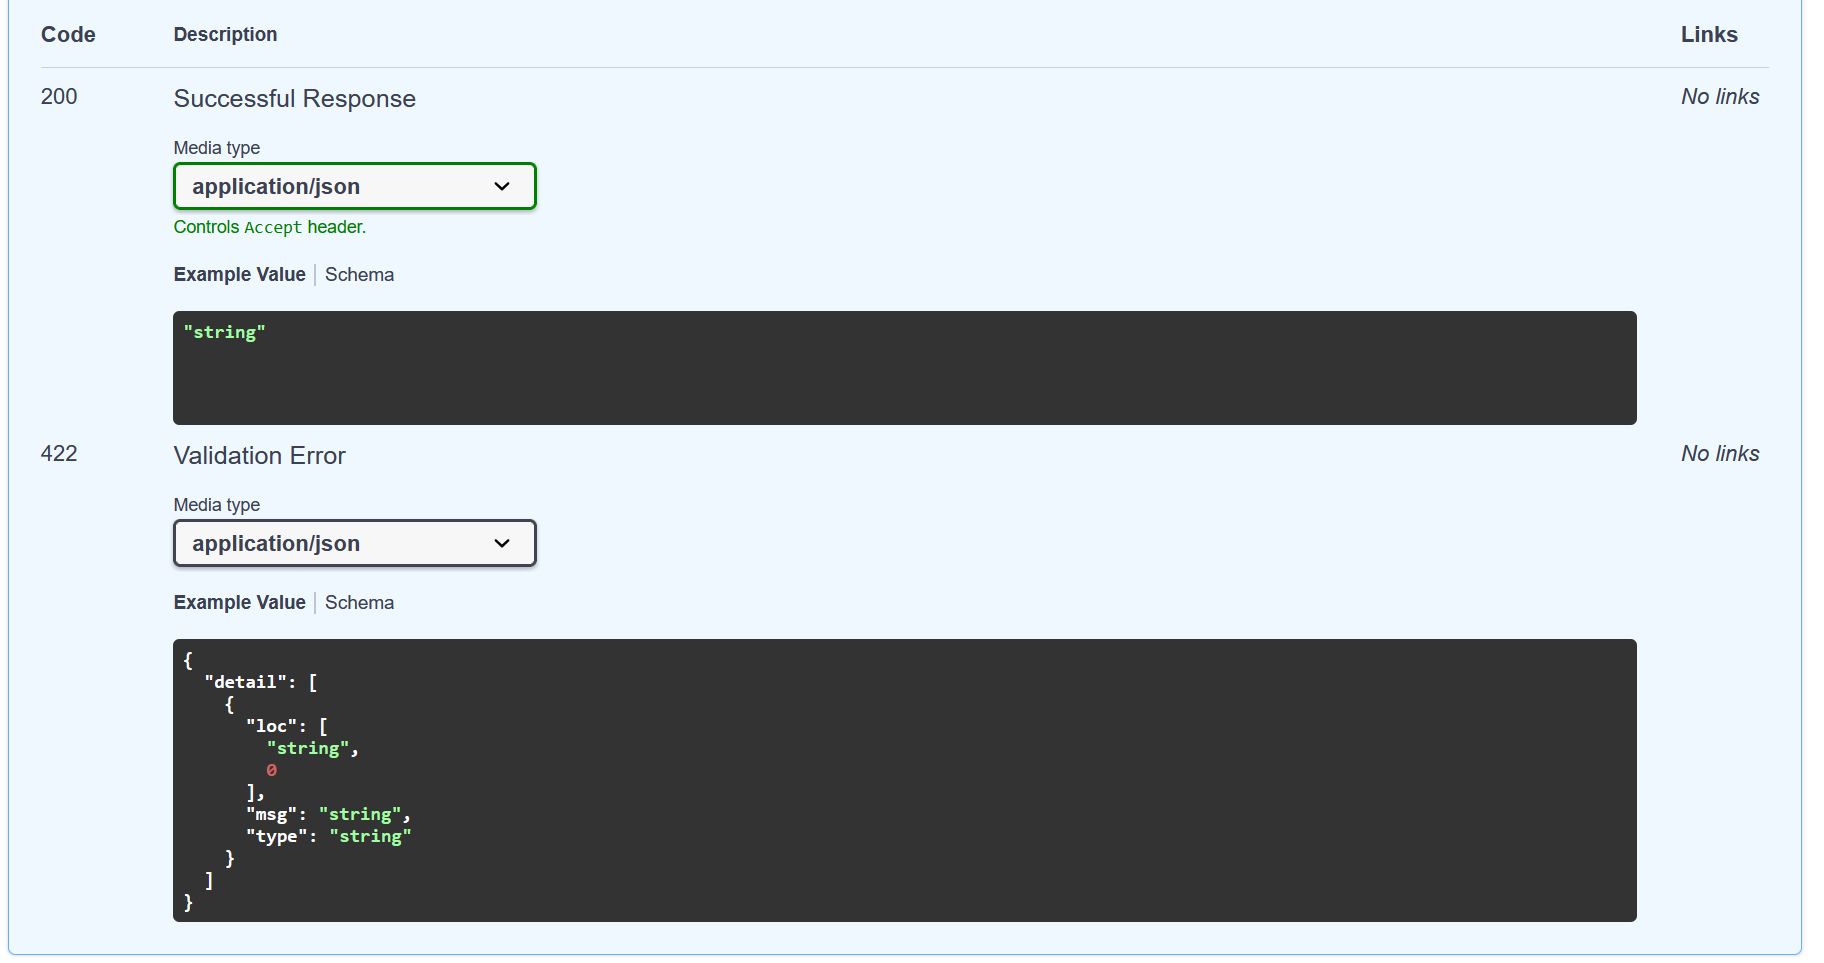